# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [ ]:
#Connecting Google drive with Google colab
# Reading the data-set into Google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the "stock_data.csv" dataset into a dataframe (i.e.loading the data)
path="/content/drive/My Drive/stock_data.csv"
data = pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks
-These can be achieved by doing the following;

1.   Viewing the first and last few rows of the dataset
2.   Checking the shape of the dataset
3. Ensuring that the data is stored in the correct format, it's important to identify the data types.
4. Getting the statistical summary for the variables.
5. Checking for missing values.
6. Checking for duplicates


### View the first and last 5 few rows of the dataset

In [ ]:
# returning the first 5 rows using the dataframe head method
data.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [ ]:
# returning the last 5 rows using dataframe tail method
data.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

#### Checking the shape of the dataset

In [ ]:
#checking shape of the dataframe to find out the number of rows and columns using the dataframe shape command
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 340 rows and 15 columns.


### Checking the columns data types for the dataset

In [ ]:
# Using the dataframe info() method to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**Observation**


*   The dataset contains 15 series (columns) of which four of the series is of the object datatype (Ticker Symbol,Security,GICS Sector and GICS Sub Industry), seven(7) of the series are of the float datatype (Current Price,Price Change, Volatility, Earnings Per Share, Estimated Shares Outstanding,P/E Ratio, and P/B Ratio), while four(4) of the series are of the integer datatype (ROE, Cash Ratio, Net Cash Flow and Net Income).
* All of these dtypes are appropriate for their respective columns

* Total memory usage is approximately 40.0+ KB.

### Creating a copy of original data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Getting the statistical summary for the variables.

In [ ]:
# checking the statistical summary of the data using describe command and transposing.
df.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

**Observation**

* There are 340  observations present in all

* Differences between mean and median values indicate skewness in the data

*  There are 11 GICS Sectors of which most of the are of the industrial sector

*  There are 104 GICS Sub induustry
*  50% of the current stock prices are below 59.705 dollars, however, the  maximum current stock price is approximately 1275 dollars.
*  75% of the variations or change in price within the selected companies is not below 10.69 dollars.
*  75% of the volatility which is a measure of the standard deviation of the stock price for the past 13 weeks was found to be below 1.6956
*  75% of the companies has its return on equity (ROE) lass than 27%
*  50% of the companies has a favoured cash ratio of 47.0. This means that most of the companies has enough cash or cash equivalent to entirely pay off all their short term debts.
*  25% of the companies has a negative net cash flow of -193906500.0 dollars. This means that the companies are paying more for obligations and liabilities than what it earns through operations.
*  75% of the companies under study has a net income of 1899000000 dollars. This indicates that after all expenses in the companies including salaries, wages, cost of good or materials, and taxes. They seem to have enough to take home.
*  75% of the companies has an Earning per share below 4.62 dollars. This means that majority of the companies if invested upon will not give a profit greater than 4.62 dollars for each share bought by an investor.






### Checking for missing values

In [ ]:
# Checking for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observation**
No null values present, therefore no missing values listed

###Checking unique values

In [ ]:
df.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

### Checking for duplicate values

In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

**Observation**
* There are no duplicate values in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [ ]:
from matplotlib import patches
import random
#creating a histogram and Boxplot using function

def histobox_plot(df, column, figsize=(15, 10), kde=False, bins=None):
    #plt.figure(figsize = (20,10))
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
    sns.set(style="darkgrid")
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=figsize,)
    # assigning a graph to each ax
    sns.boxplot(df, x=column, ax=ax_box,showmeans=True, color="violet")
    sns.histplot(data=df, x=column, ax=ax_hist)
    ax_hist.axvline(
        data[column].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        data[column].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    for p in ax_hist.patches:
      height = p.get_height() # get the height of each bar
      # adding text to each bar
      ax_hist.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
      y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
      s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
      ha = 'center') # sets horizontal alignment (ha) to center

**`Current Price`**

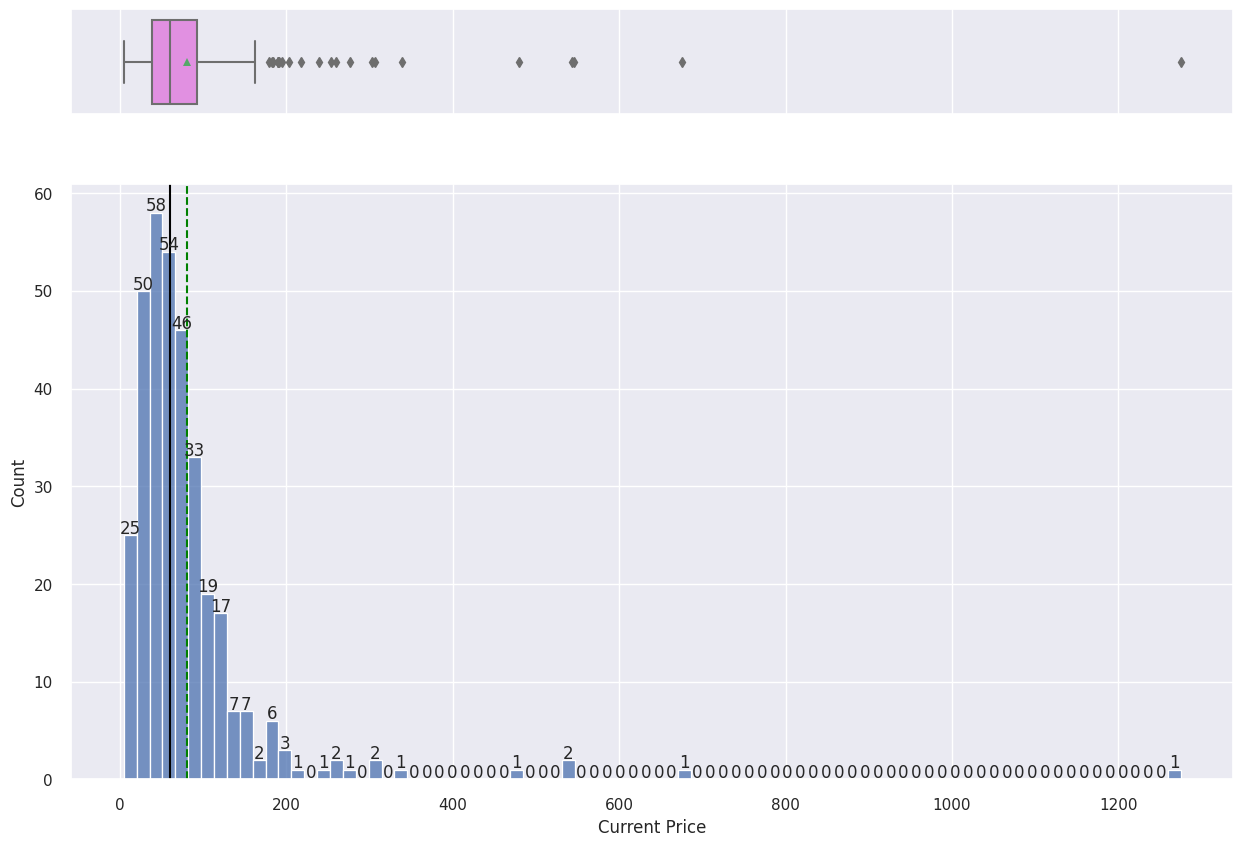

In [ ]:
histobox_plot(df, 'Current Price')

**Observation**
* The average current stock price of the companies under study is 80.86 dollars which is higher than the median 59.705 dollars indicating that the distribution is a right-skewed with 49 of the 340 stocks having twice the median value of all stocks
* As expected, no stock is listed at less of less than 0 dollars
* There are outliers

**`Price Change`**

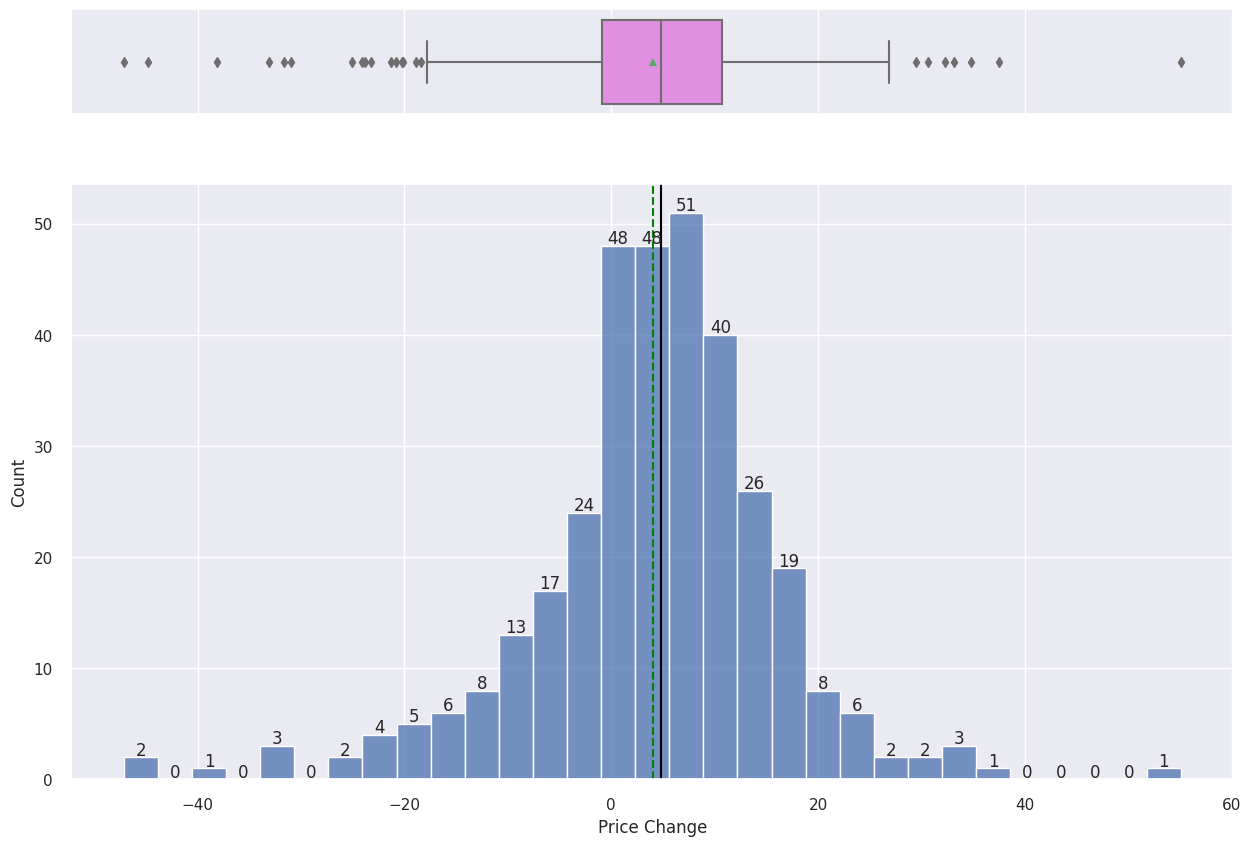

In [ ]:
histobox_plot(df, 'Price Change')

**Observation**
* The average variation in price or price change of the companies under study is 4.078 dollars which is lesser than the median 4.819 dollars indicating that the distribution is a left-skewed
* While there is a tendency for the distribution to favor lower volatilities, it is important to note the presence of extended tails in both positive and negative price changes. Among the most volatile stocks, price fluctuations span from a significant 47% decrease to a substantial 55% increase over a 13-week period.
* There are outliers

**`Volatility`**

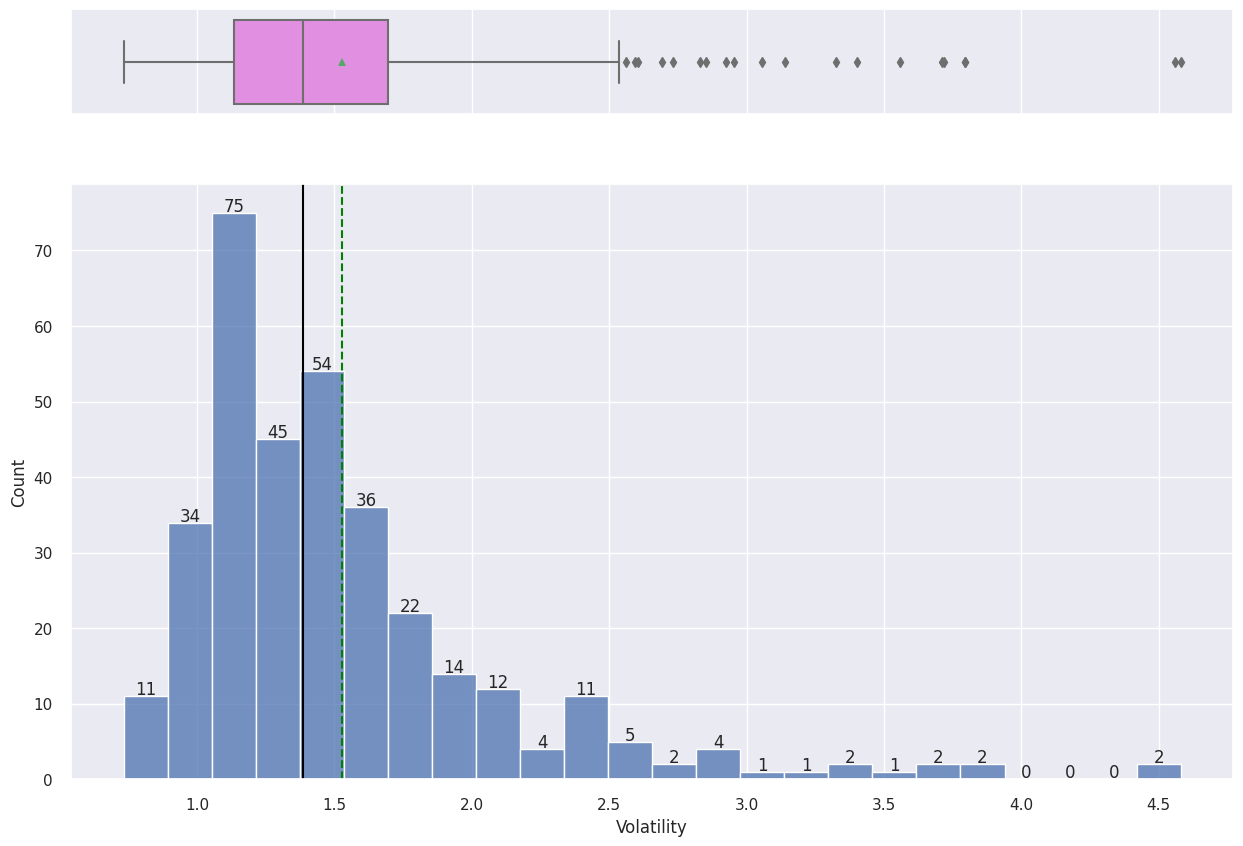

In [ ]:
histobox_plot(df, 'Volatility')

**Observation**
* The mean volatility of the companies under study is 1.526 which is higher than the median 1.386 dollars indicating that the distribution is a right-skewed
* There are outliers

**`ROE`**

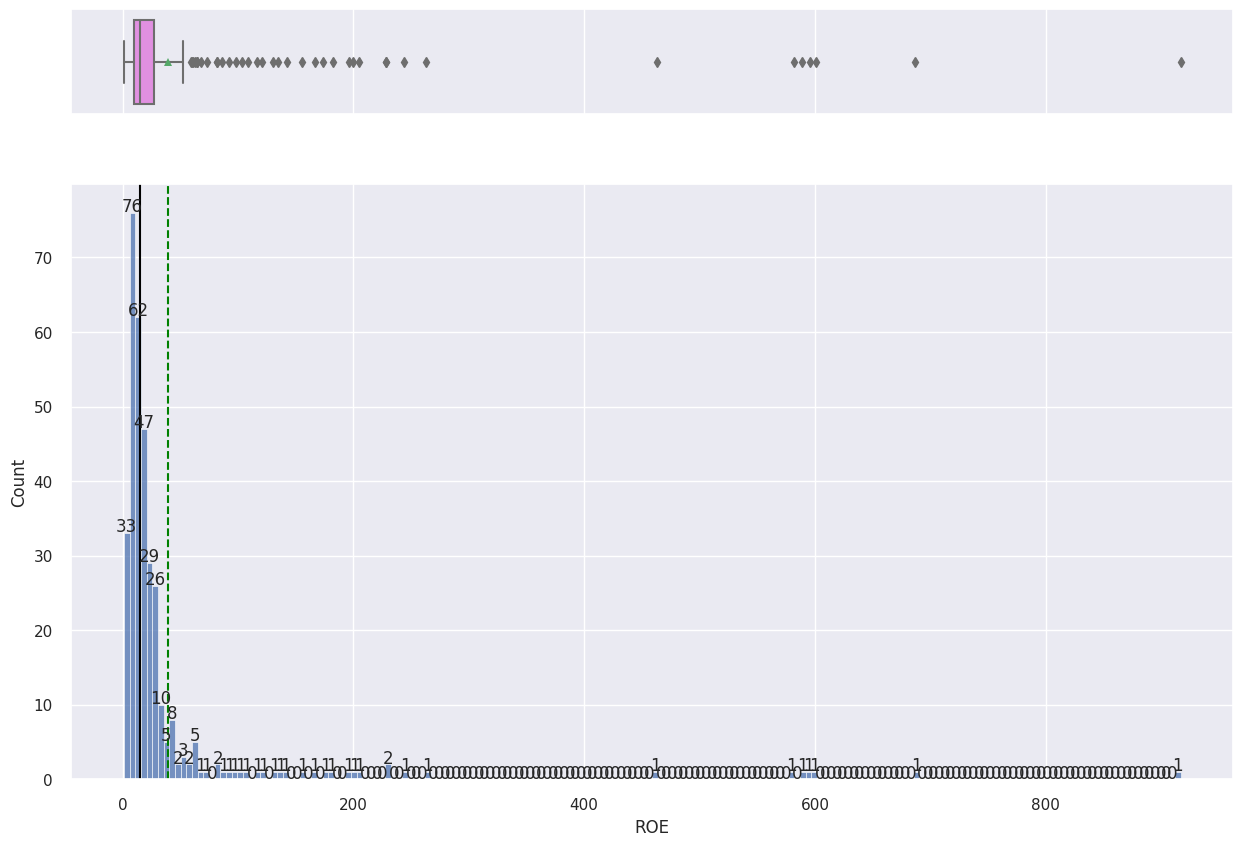

In [ ]:
histobox_plot(df, 'ROE')

**Observation**
* The mean Return on Equity (ROE) of the companies under study is 39.60% which is higher than the median 15.0%  indicating that the distribution is a right-skewed.
* There are no stocks listed with values below 0 for either metric. For instance, there are 24 stocks listed with returns on equity below 5, while 25 stocks are listed with returns exceeding 100 percent.
* There are outliers

**`Cash Ratio`**

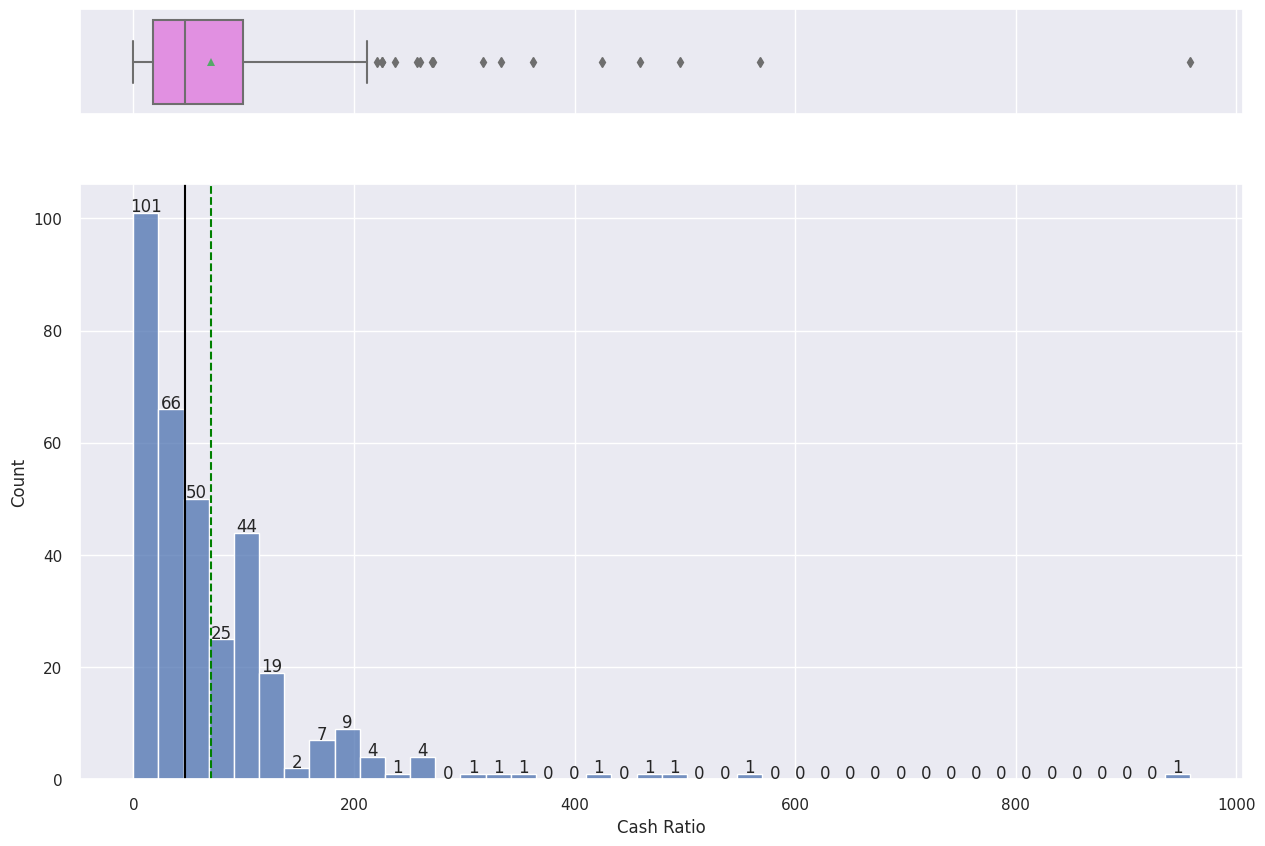

In [ ]:
histobox_plot(df, 'Cash Ratio')

**Observation**
* The mean cash ratio of the companies under study is 70.02  which is higher than the median 47 indicating that the distribution is a right-skewed
* There are outliers

**`Net Cash Flow`**

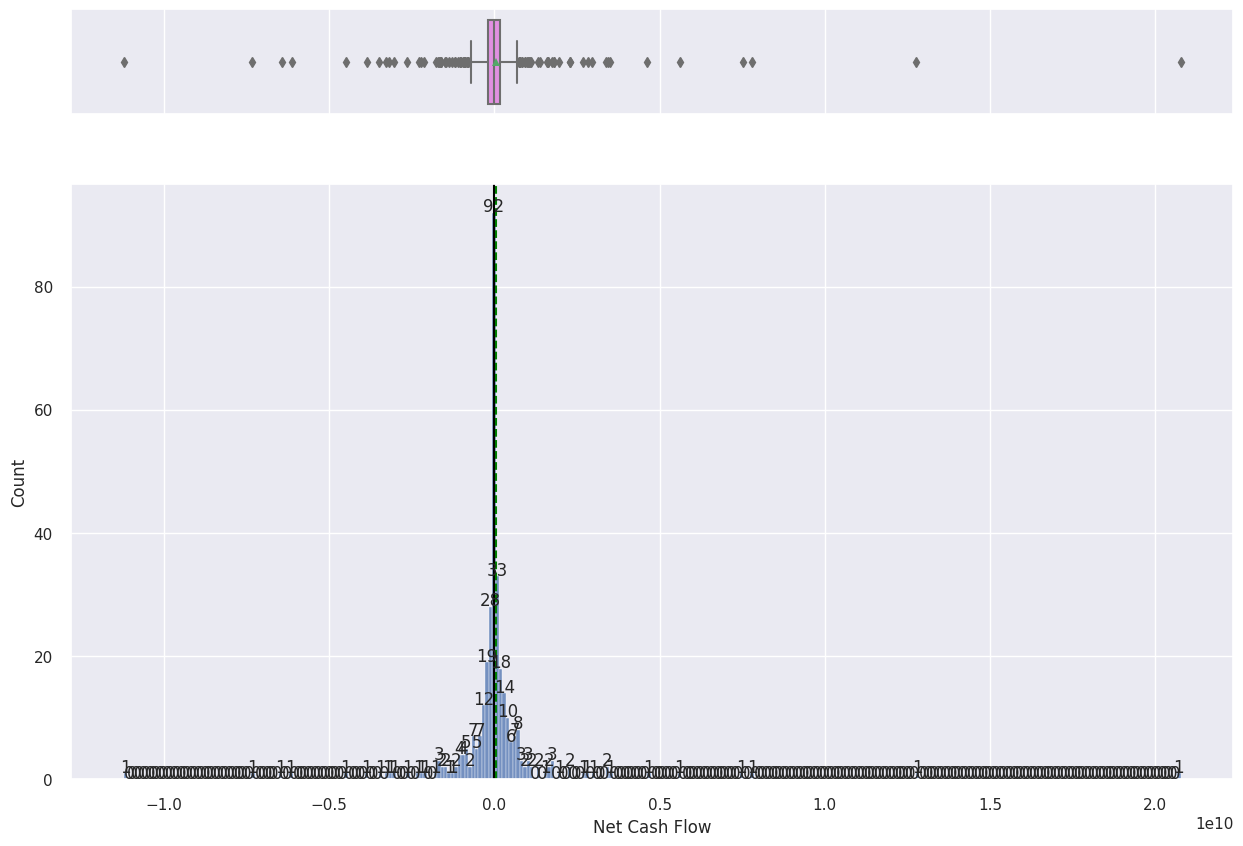

In [ ]:
histobox_plot(df, 'Net Cash Flow')

**Observation**
* The mean Net Cash Flow of the companies under study is 55537620.59 dollars which is higher than the median 2098000 dollars indicating that the distribution is a right-skewed
* There are outliers

**`Net Income`**

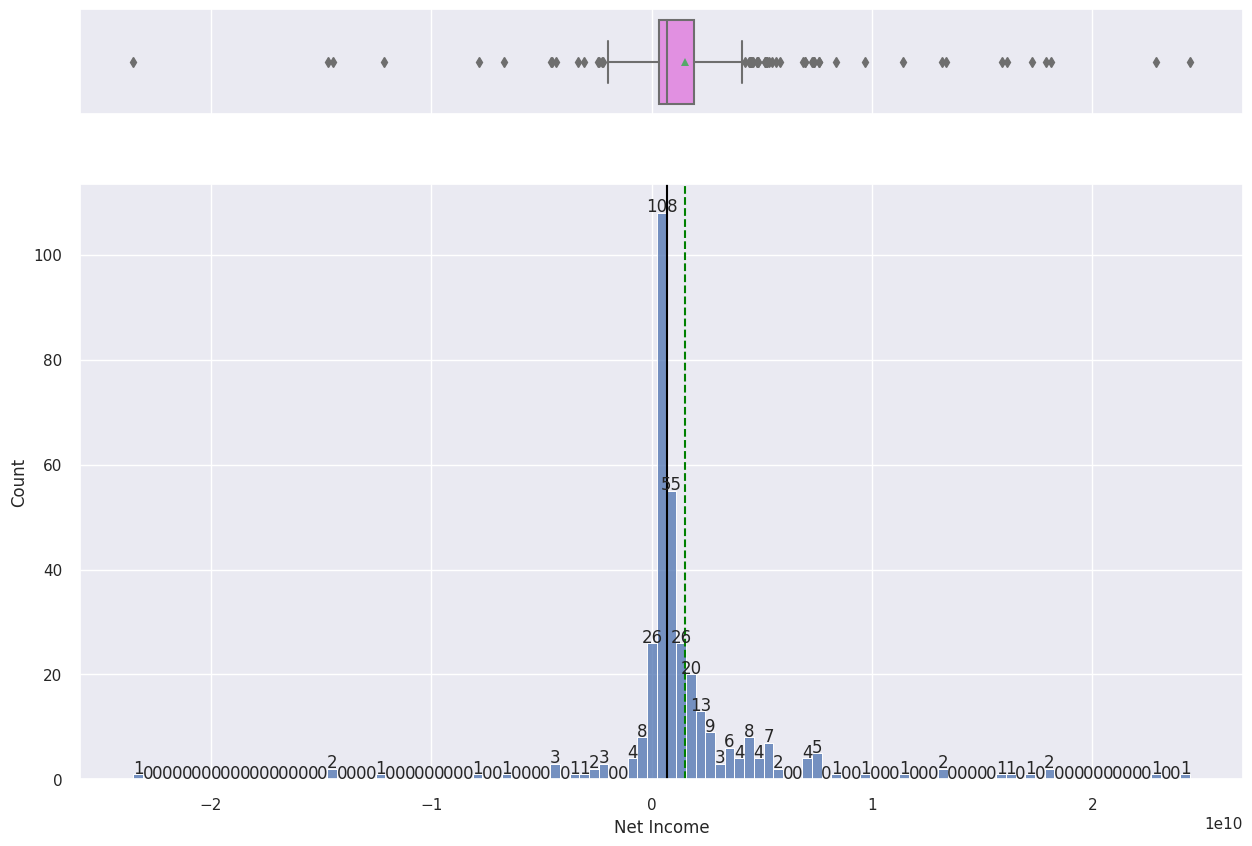

In [ ]:
histobox_plot(df, 'Net Income')

**Observation**
* The mean Net Income of the companies under study is 1494384602.94 dollars which is higher than the median 707336000 dollars indicating that the distribution is a right-skewed
* There are outliers

**`Earnings Per Share`**

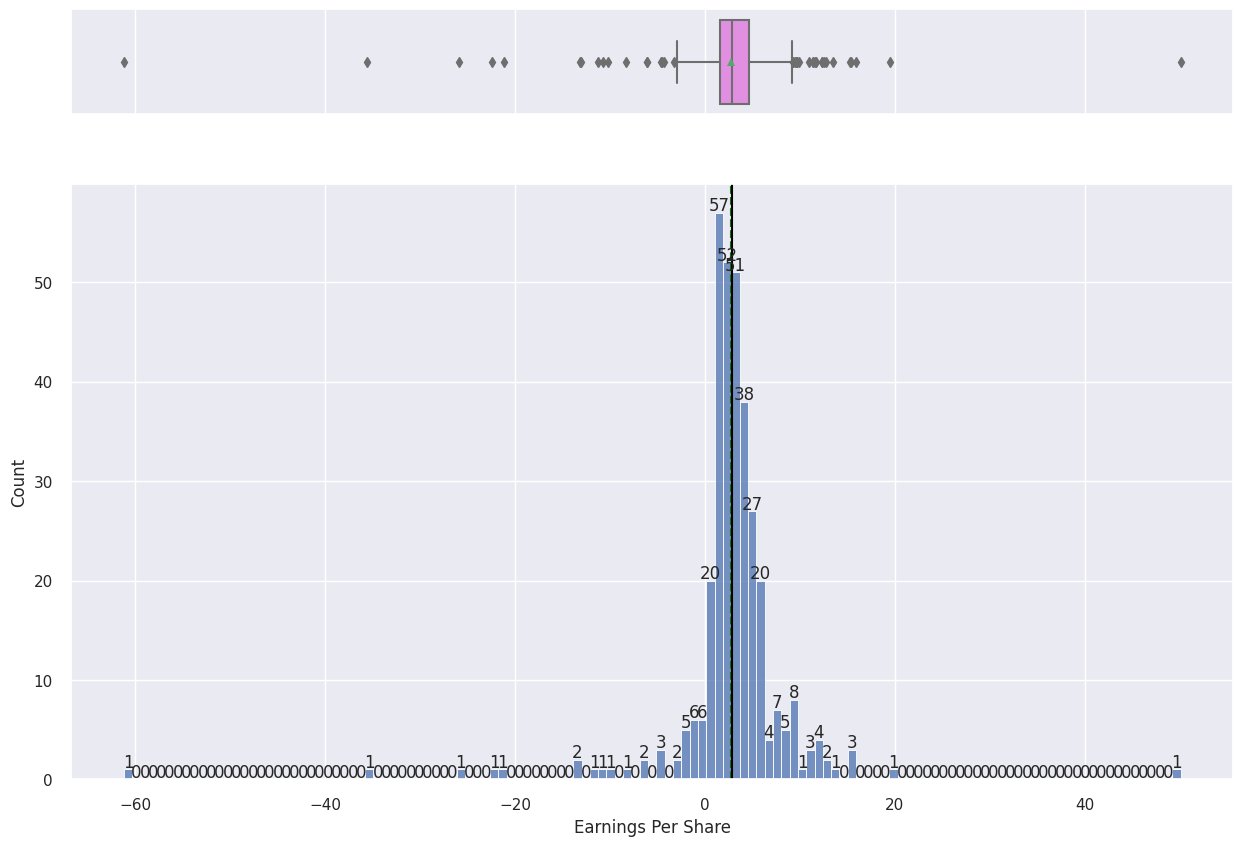

In [ ]:
histobox_plot(df, 'Earnings Per Share')

**Observation**
* The mean Earnings per share of the companies under study is 2.77 dollars which is lesser than the median 2.90 dollars indicating that the distribution is a left-skewed
* There are outliers

**`Estimated Shares Outstanding`**

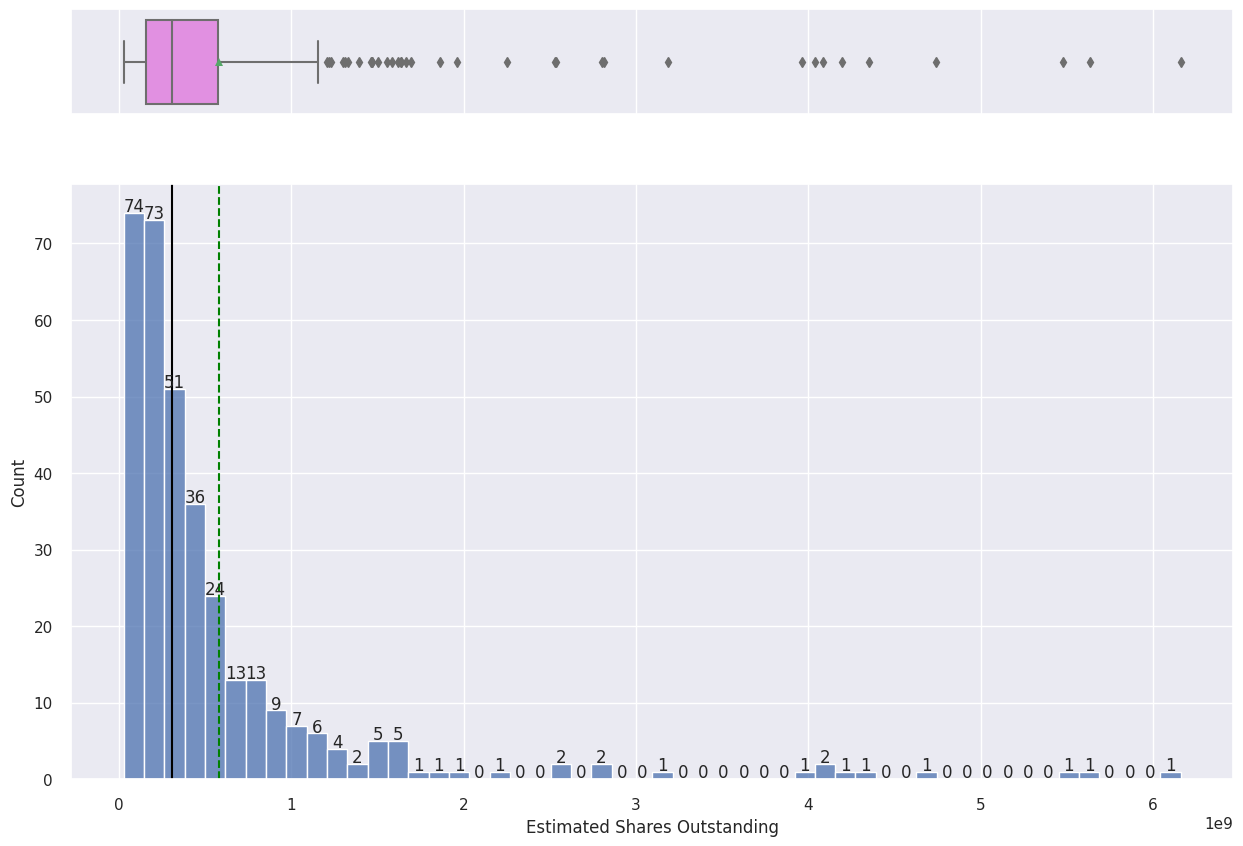

In [ ]:
histobox_plot(df, 'Estimated Shares Outstanding')

**Observation**
* The mean Estimated Shares Outstanding of the companies under study is 577028337.75 dollars which is higher than the median 309675137.8 dollars indicating that the distribution is a right-skewed
* There are outliers

**`P/E Ratio`**

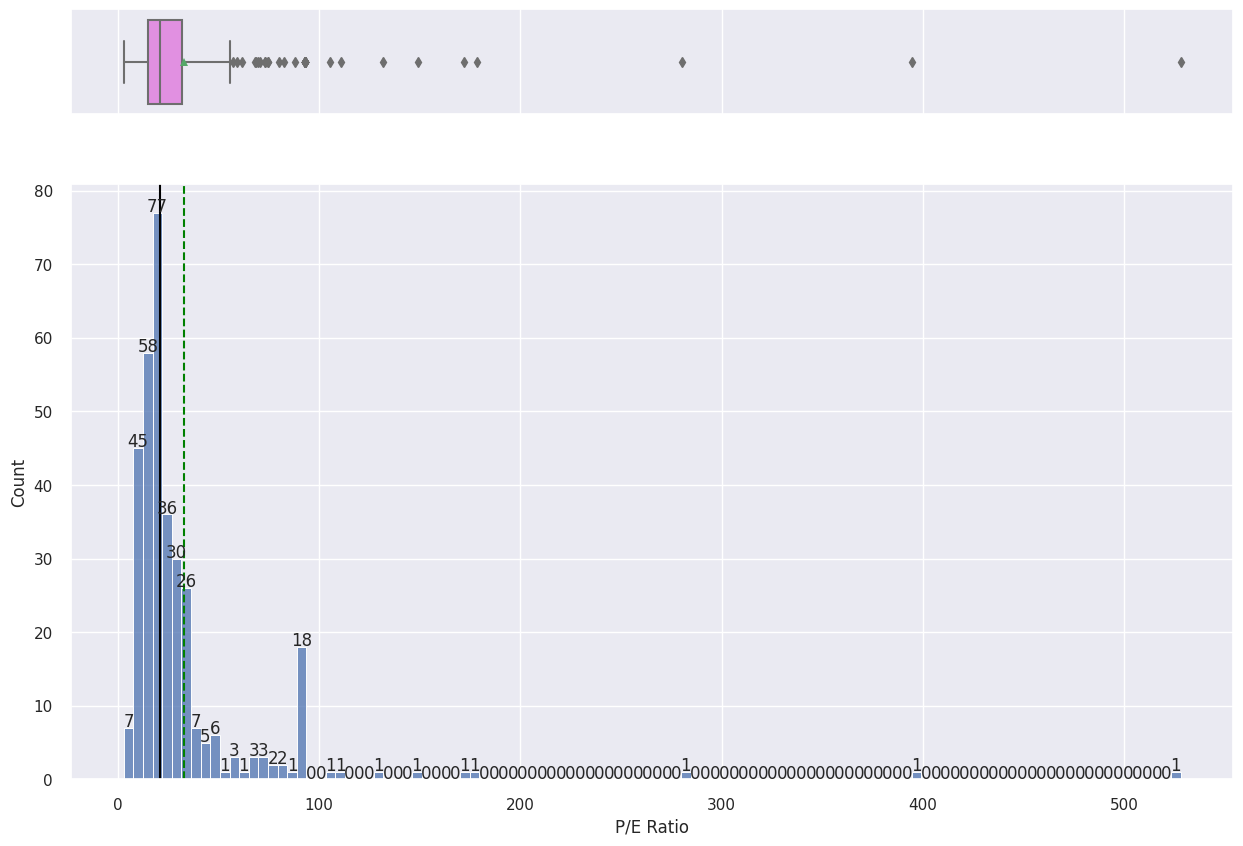

In [ ]:
histobox_plot(df, 'P/E Ratio')

**Observation**
* The mean P/E ratio  of the companies under study is 32.6 which is greater than the median 20.82 dollars indicating that the distribution is a right-skewed
* There are outliers

**`P/B Ratio`**

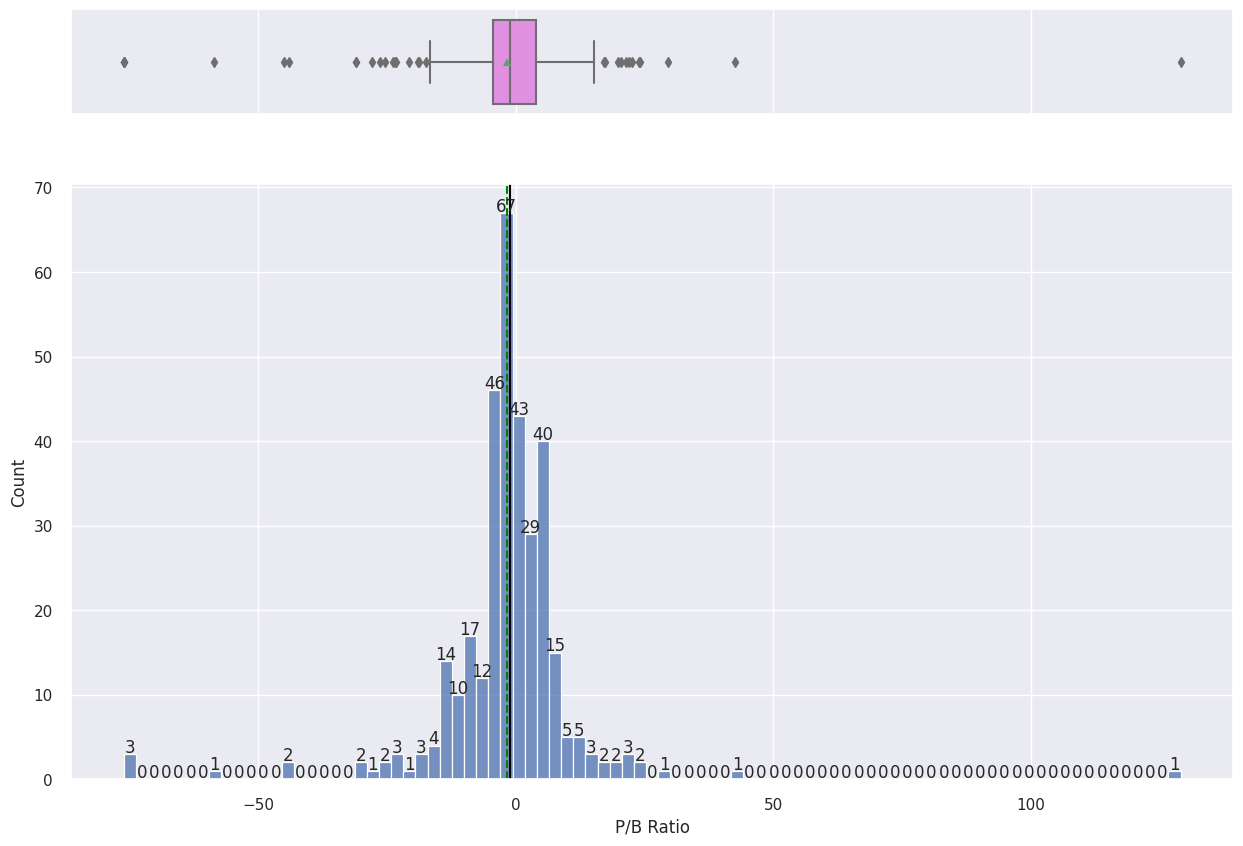

In [ ]:
histobox_plot(df, 'P/B Ratio')

**Observation**
* The P/B of the companies under study is -1.718  which is lesser than the median -1.067 indicating that the distribution is a left-skewed
* The distribution for P/B ratios is mostly centered around 0 but with long positive and negative
    - For example, 175 of the 340 total stocks are shown to below the 25th percentile and above the 75th percentile and
    - Additionally, 31 of the stocks are outliers


In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

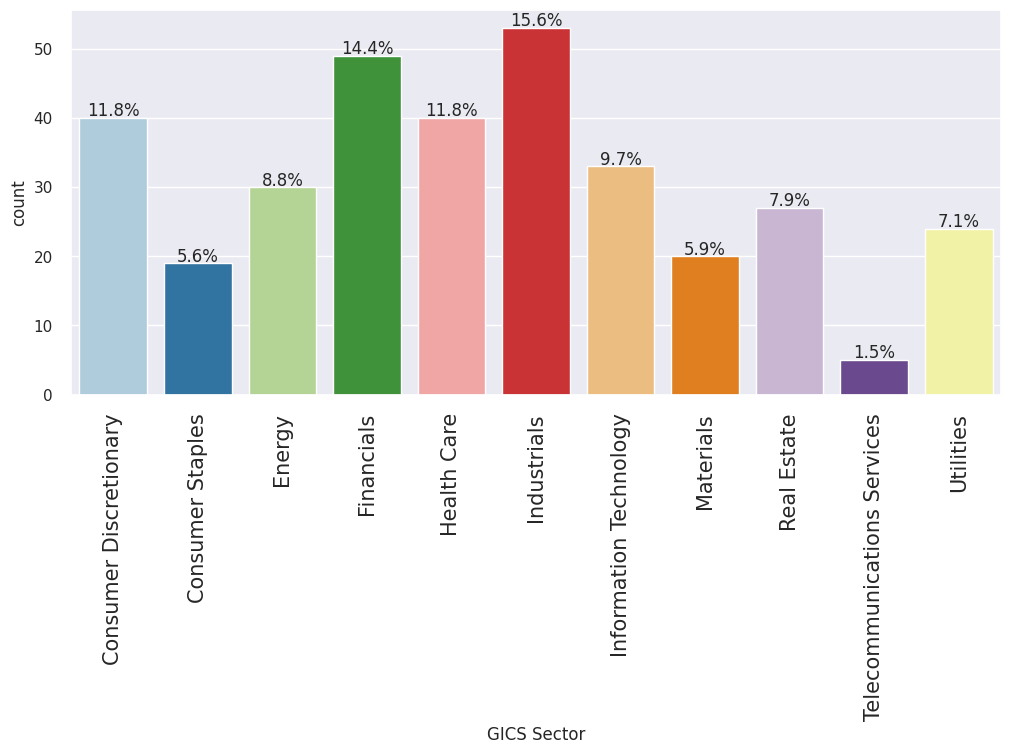

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

**`GICS Sub Industry`**

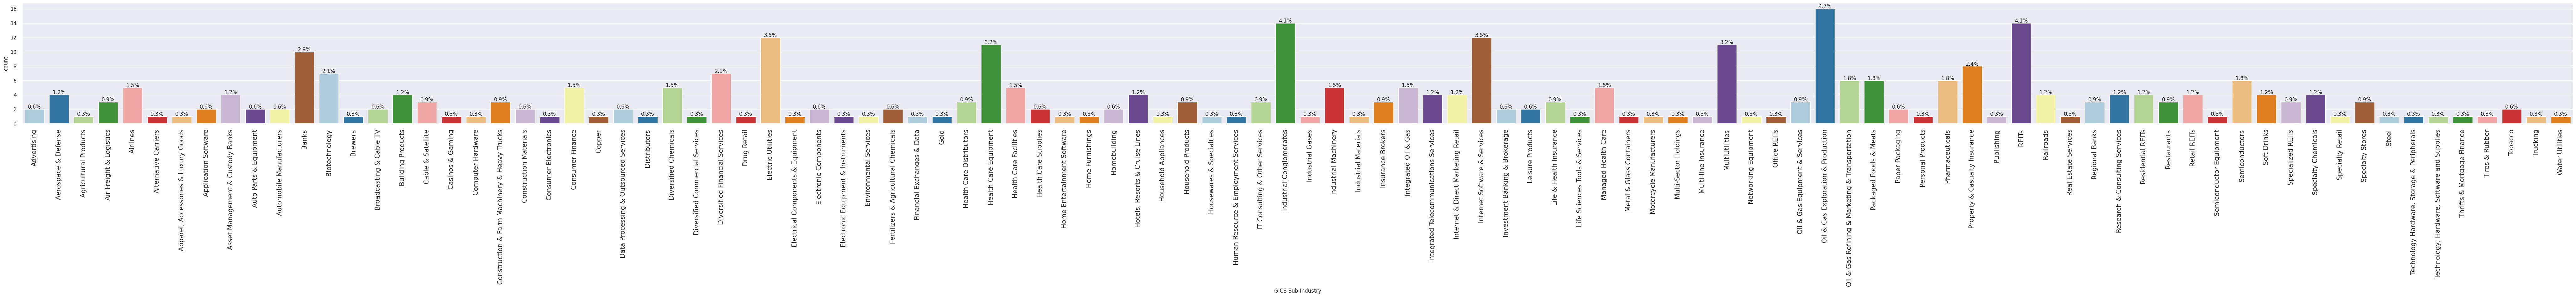

In [ ]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

### Bivariate Analysis

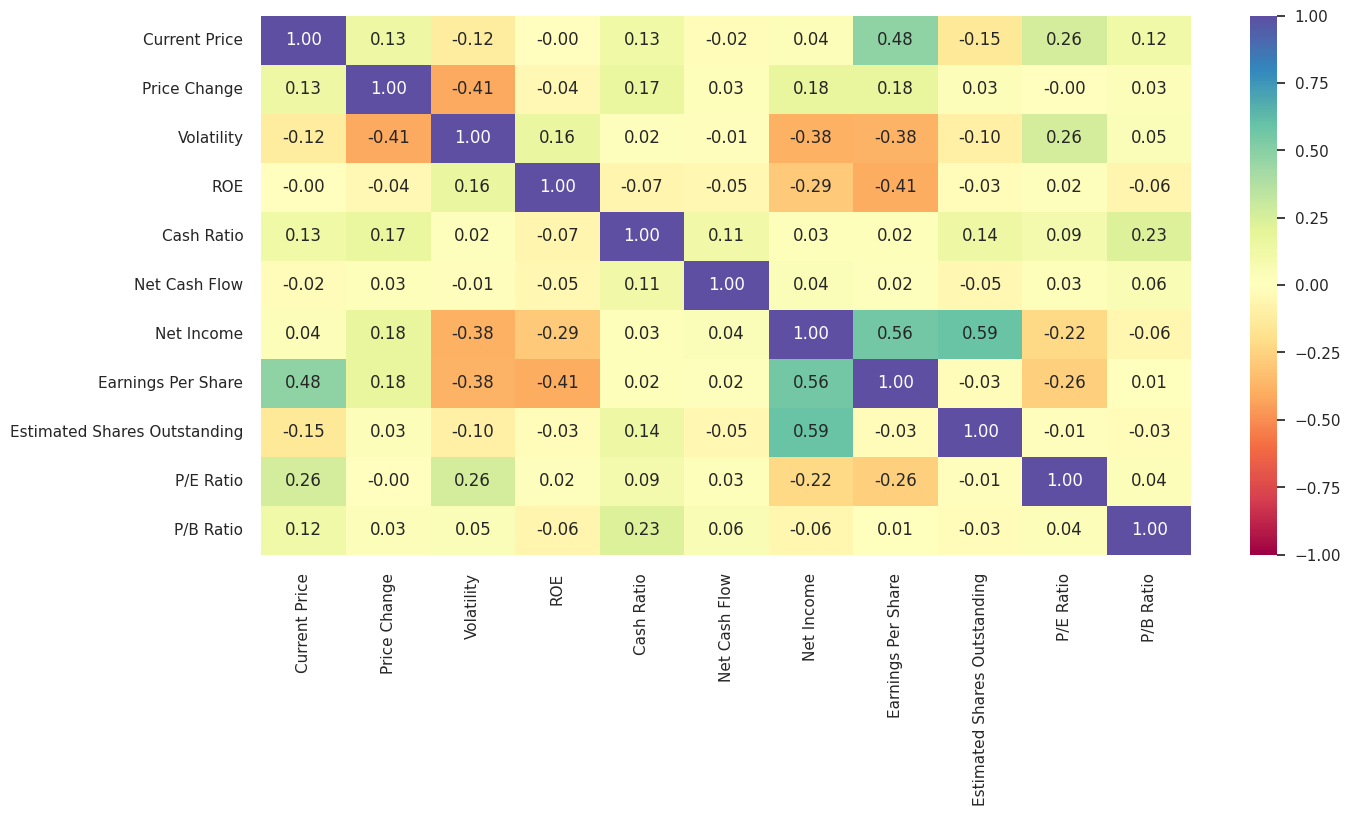

In [ ]:
# #Using heatmap to check correlation between series
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observation**
:Some variables exhibit moderate correlations (+/- .40) with one another.
* Volatility demonstrates a negative correlation with price change, implying that an increase in a stock's volatility is likely accompanied by a decrease in its price.
* Net income displays a negative correlation with volatility, suggesting that higher net income is associated with lower price volatility.
* Net income also exhibits a positive correlation with earnings per share (EPS) and estimated shares outstanding.
* EPS shows a positive correlation with the current price, indicating that an increase in a company's EPS is likely to lead to a corresponding rise in its stock price.
* EPS is inversely correlated with return on equity (ROE), implying that as a company generates more equity for shareholders, the subsequent net income will yield a comparatively lower return.


**The stocks of which economic sector have seen the maximum price increase on average?.**

In [ ]:
df.groupby('GICS Sector')['Price Change'].mean().sort_values()

GICS Sector
Energy                        -10.228289
Utilities                       0.803657
Industrials                     2.833127
Financials                      3.865406
Materials                       5.589738
Consumer Discretionary          5.846093
Real Estate                     6.205548
Telecommunications Services     6.956980
Information Technology          7.217476
Consumer Staples                8.684750
Health Care                     9.585652
Name: Price Change, dtype: float64

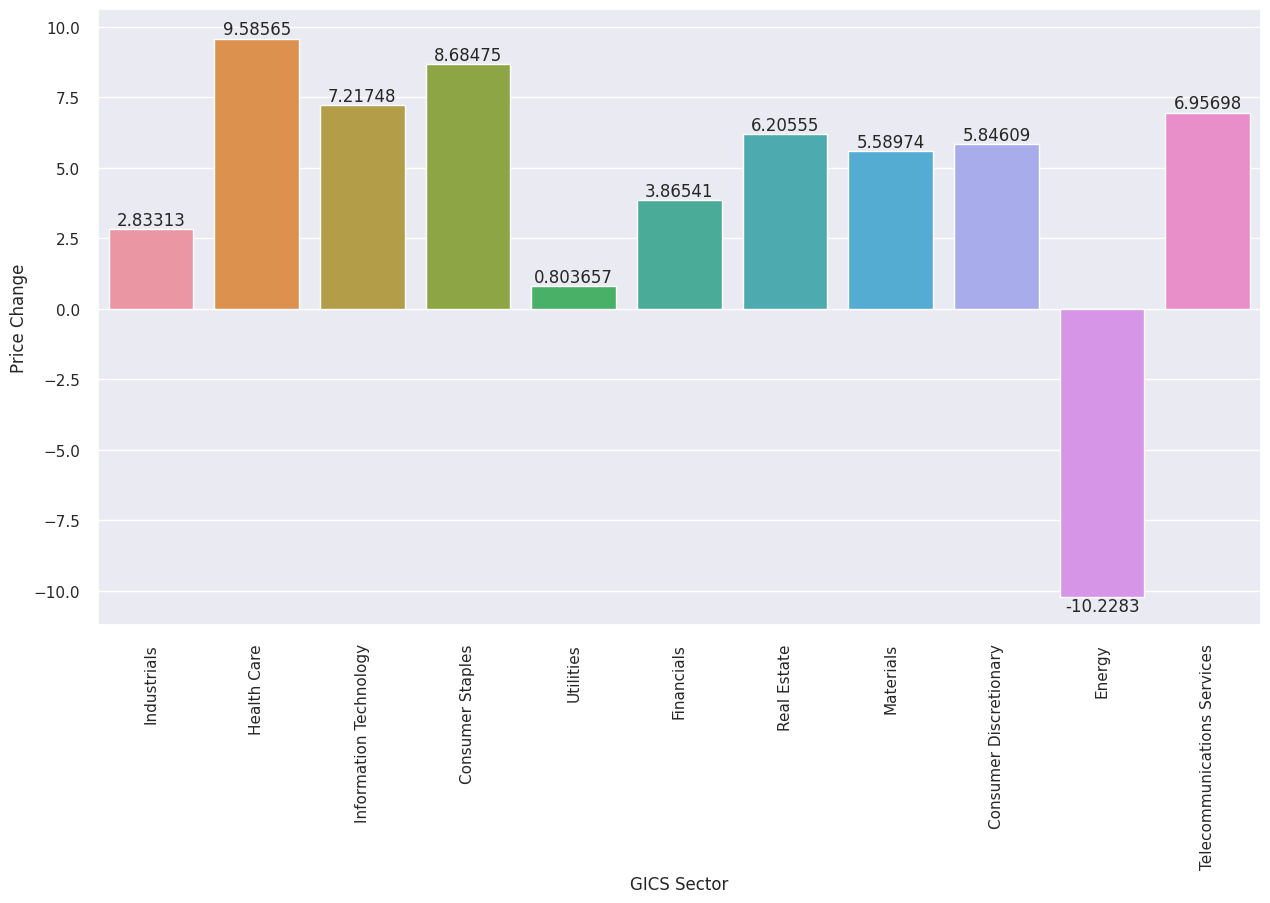

In [ ]:
plt.figure(figsize=(15,8))
ax=sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

**Observation**
In the preceding period, stocks within the healthcare sector have demonstrated the most notable average price escalation.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?.**

In [ ]:
df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

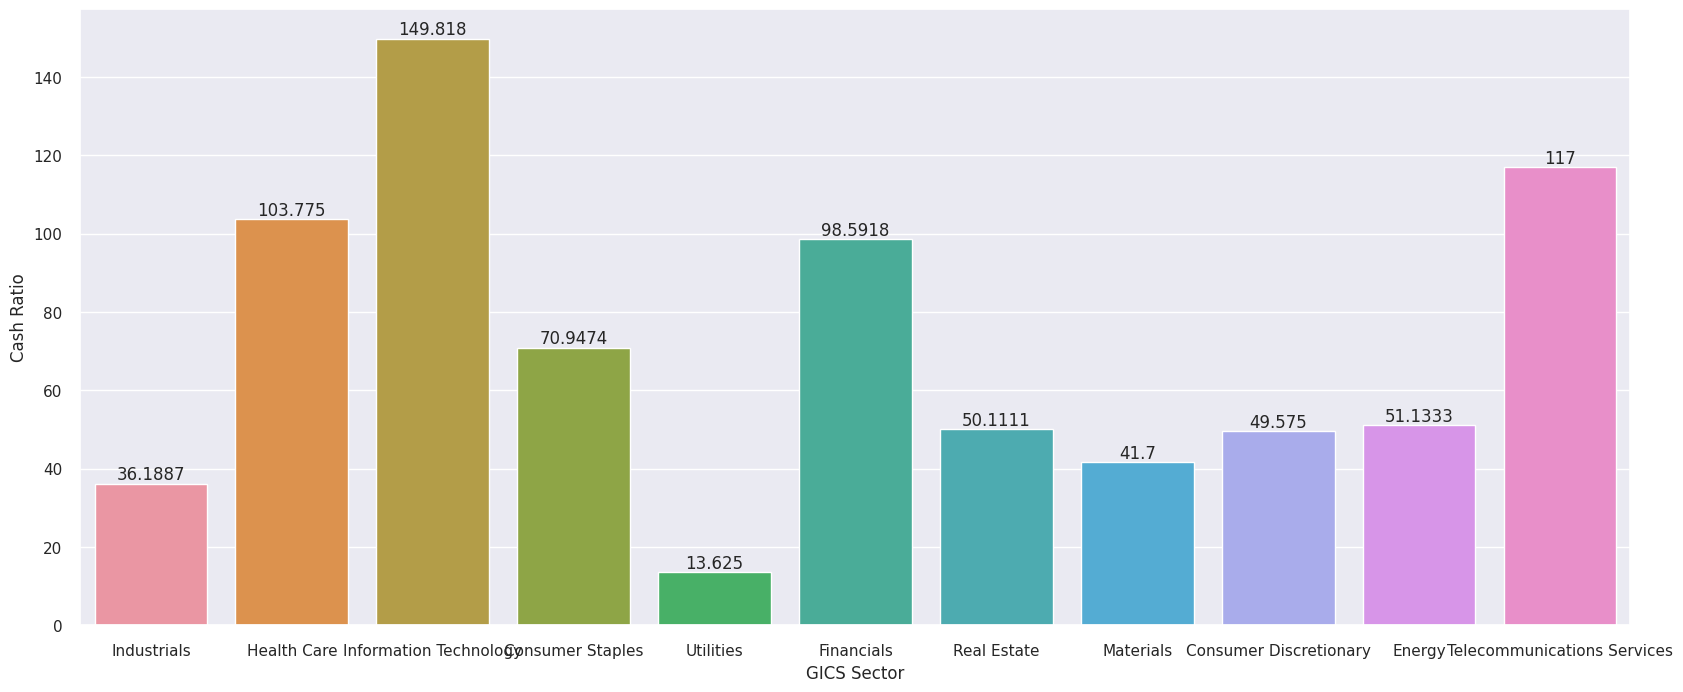

In [ ]:
plt.figure(figsize=(20,8))
ax=sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

**Observation**
* The IT and Telecommunications sectors, characterized as relatively newer and less regulated industries, exhibit notably elevated average cash ratios compared to their peer sectors.
* In contrast, the Utilities sector, which operates within a highly regulated environment, records the most modest average cash ratios among all sectors.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

In [ ]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

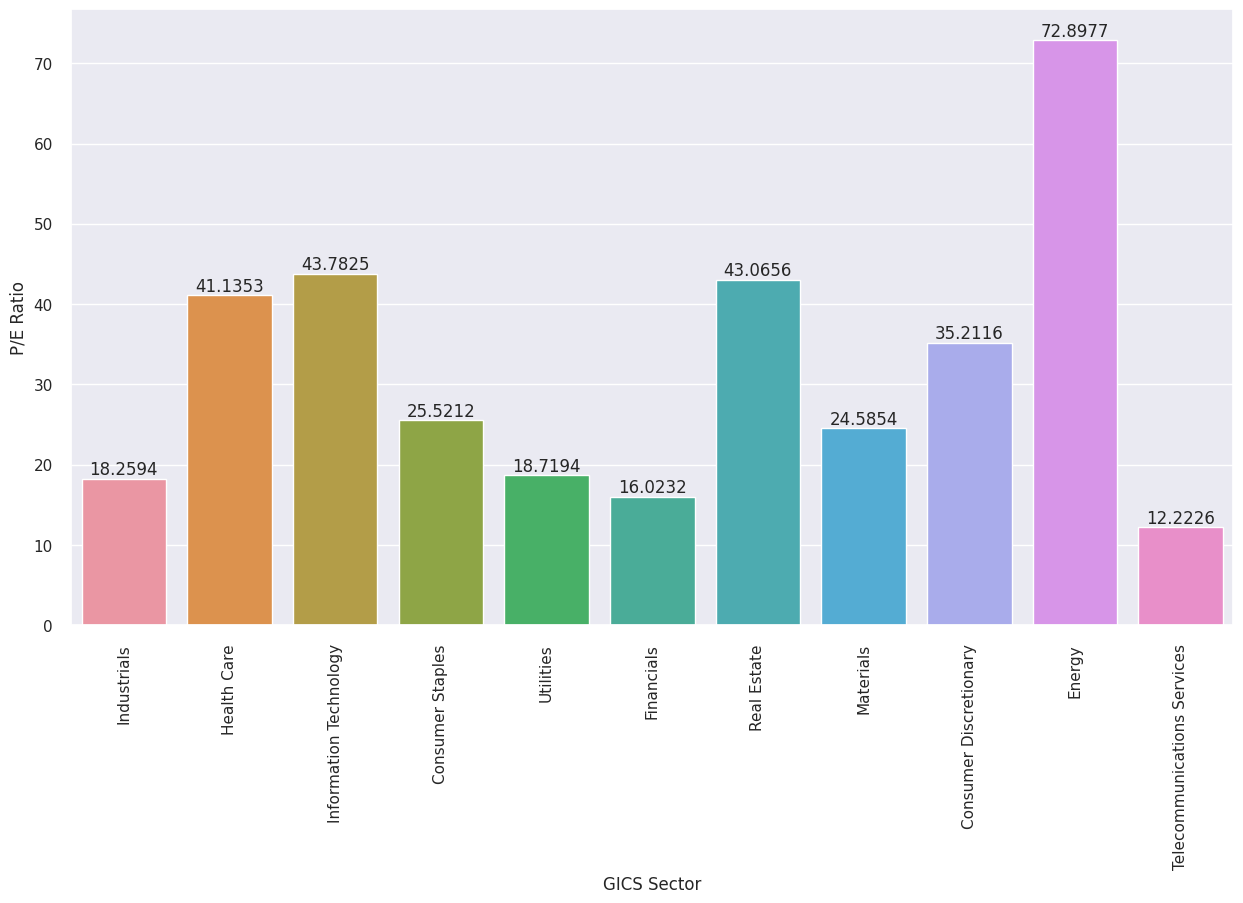

In [ ]:
plt.figure(figsize=(15,8))

ax=sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

**Observation**
* Energy enterprises maintain a substantial lead in average P/E ratios across all sectors, while telecommunications companies feature the lowest average P/E ratios.


**Volatility is responsible for the oscillations observed in stock prices. Stocks characterized by high volatility tend to experience more pronounced fluctuations, thereby increasing their investment risk. Now, let's examine the average variations in volatility within different economic sectors.**

In [ ]:
df.groupby('GICS Sector')['Volatility'].mean().sort_values(ascending=False)

GICS Sector
Energy                         2.568777
Materials                      1.816726
Information Technology         1.659801
Consumer Discretionary         1.595478
Health Care                    1.541023
Industrials                    1.416989
Telecommunications Services    1.341612
Financials                     1.267255
Real Estate                    1.206053
Consumer Staples               1.152675
Utilities                      1.118018
Name: Volatility, dtype: float64

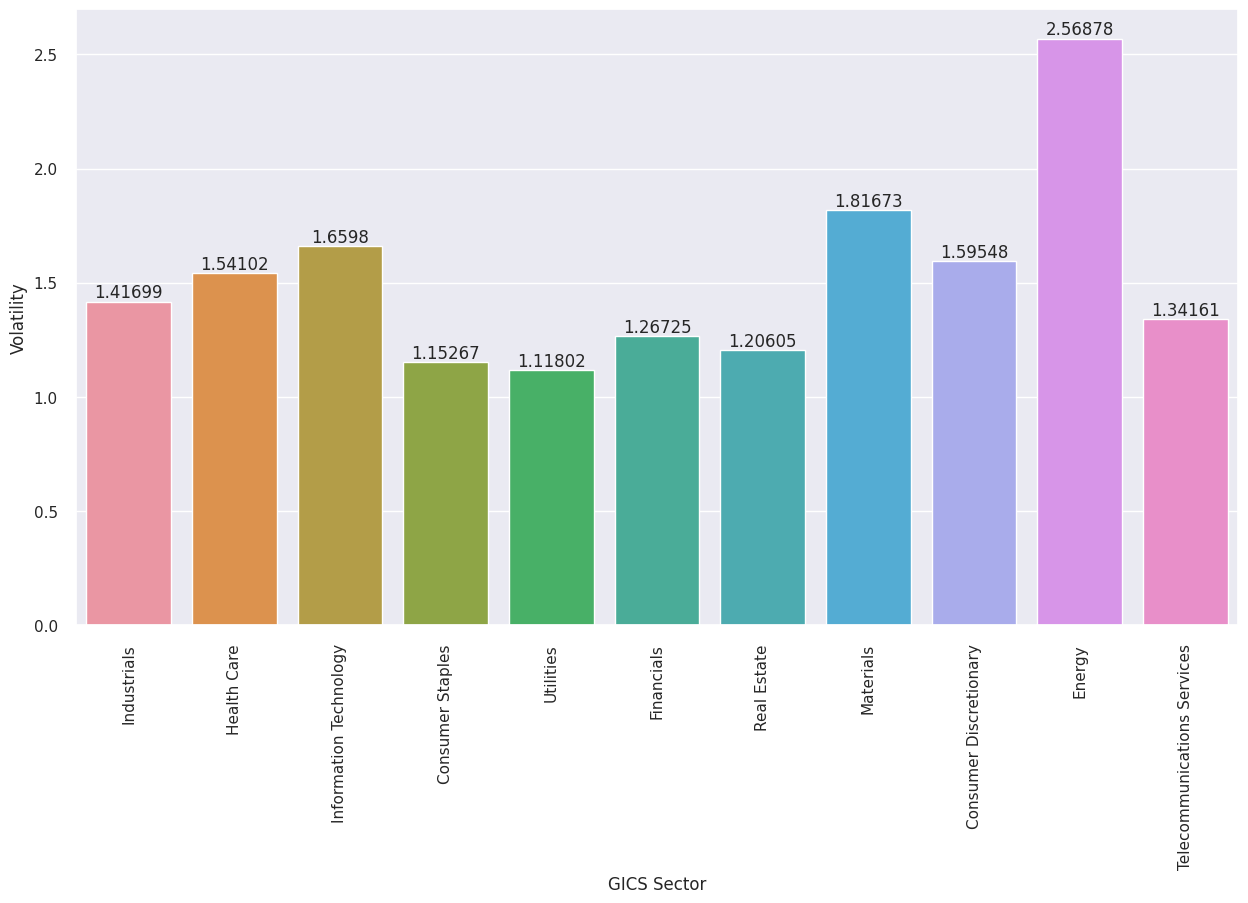

In [ ]:
plt.figure(figsize=(15,8))

ax=sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

**Observation**
* Among the sectors, the energy sector exhibits the highest level of volatility, closely trailed by the material sector. In contrast, the utilities sector demonstrates the lowest level of volatility.


**The Earnings Per Share (EPS) metric plays a significant role in influencing stock investments. EPS represents the portion of a company's profit allocated to each outstanding share of its common stock. It serves as a crucial indicator of a company's financial health and performance, impacting investor decisions Now, let's examine the average variations in Earnings Per Share within different economic sectors.**


In [ ]:
df.groupby('GICS Sector')['Earnings Per Share'].mean().sort_values(ascending=False)

GICS Sector
Health Care                    4.541250
Consumer Discretionary         4.525750
Industrials                    4.456792
Financials                     4.220408
Telecommunications Services    3.550000
Consumer Staples               3.224211
Materials                      3.129000
Utilities                      2.753125
Real Estate                    2.340000
Information Technology         2.266061
Energy                        -6.908333
Name: Earnings Per Share, dtype: float64

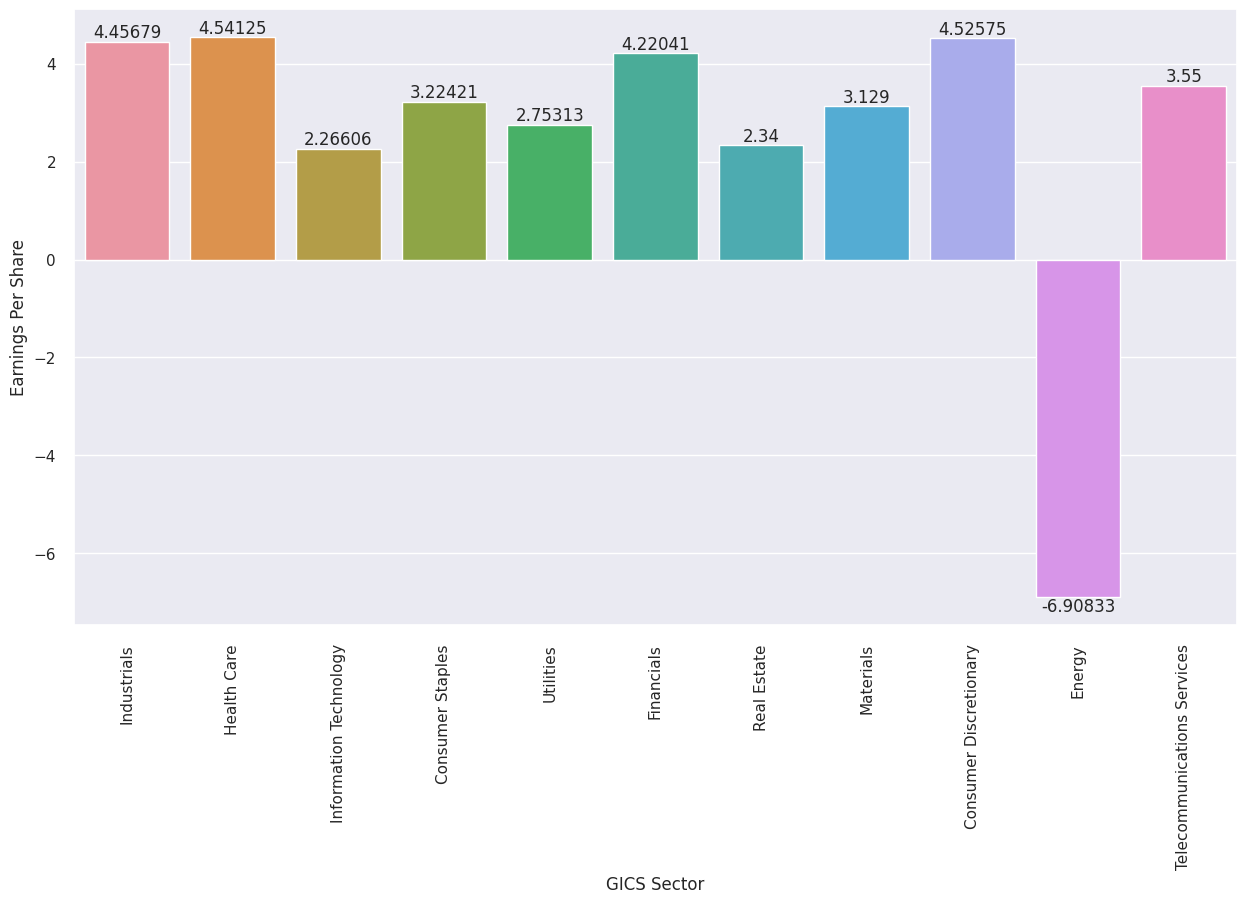

In [ ]:
plt.figure(figsize=(15,8))

ax=sns.barplot(data=df, x='GICS Sector', y='Earnings Per Share', ci=False)
for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation=90)
plt.show()

**Observation**
* The health sector was found to have the highest earnings per share, an investor who invest in the health sector is likely to have a profit of 4.54 dollars or above per share in invested.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Plotting the boxplots of all numerical columns to check for outliers.

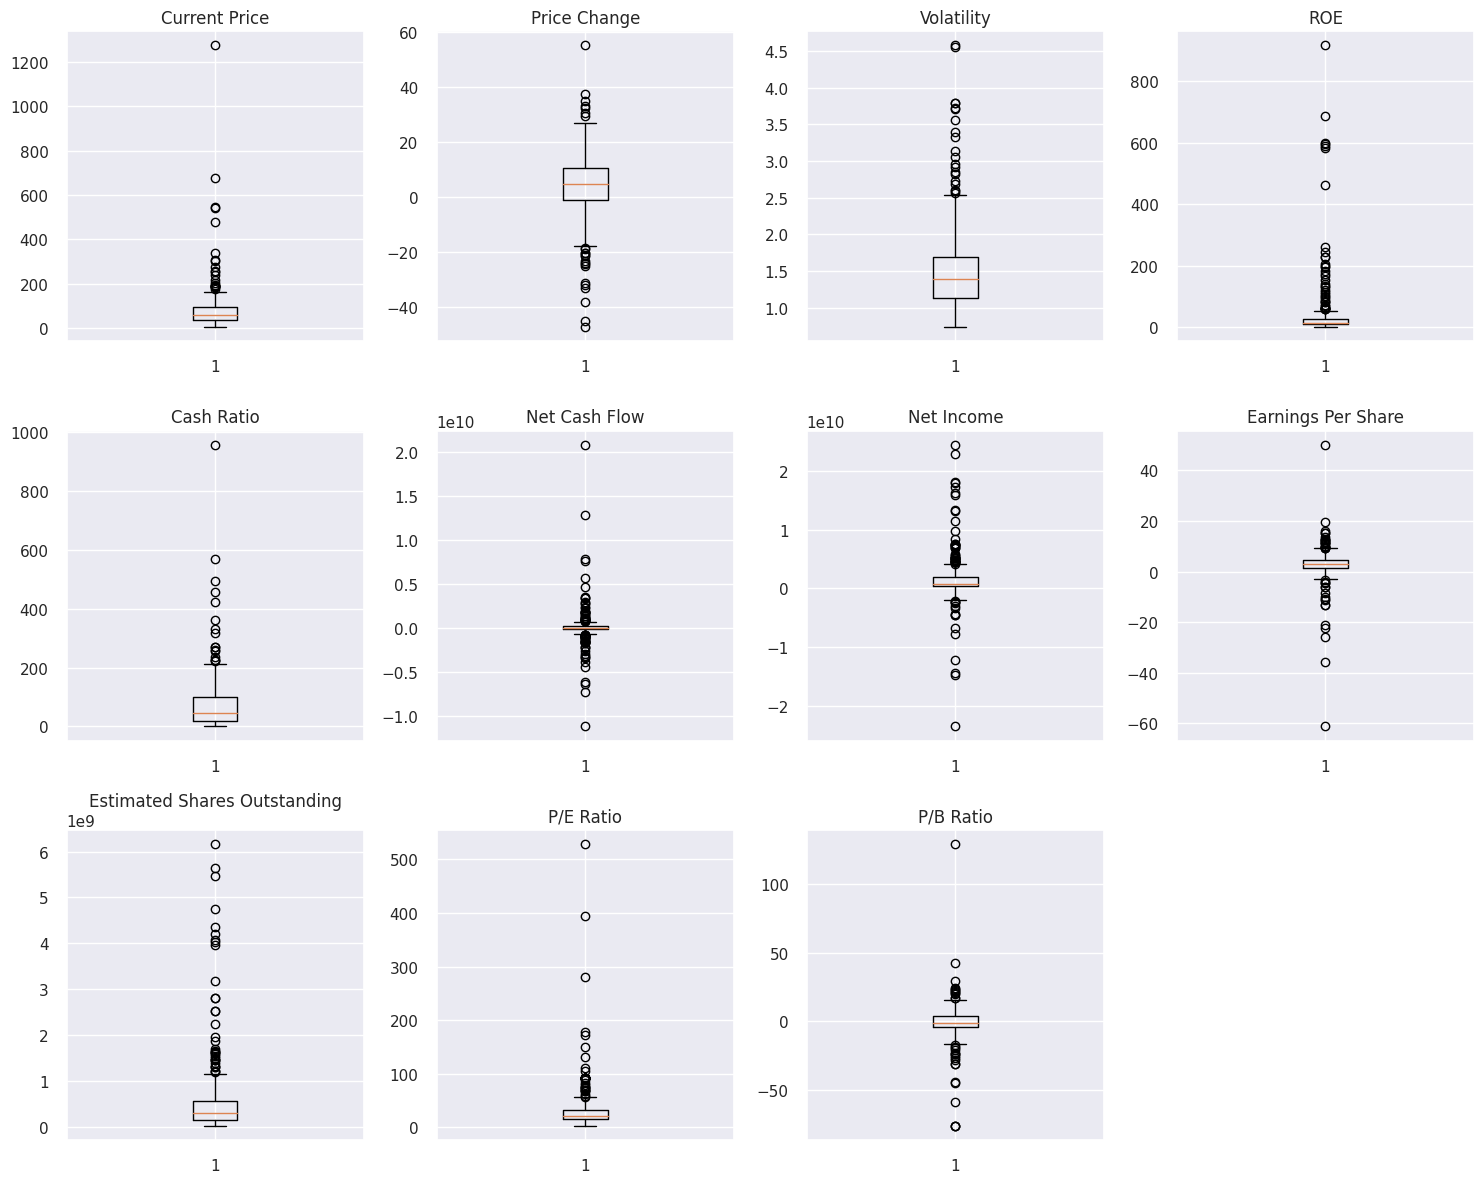

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation**
* Each of these variables contains a few or several outliers; nevertheless, these values do not seem implausible considering the inherent nature of stock prices and historical anticipations.

### Scaling

- Prior to engaging in the clustering process, it is imperative to preprocess and scale the data. This step ensures that each variable exerts a comparable influence on the clustering outcome, thus preventing any single variable from overshadowing others. By scaling the data, we create a balanced and equitable platform for the clustering analysis to unfold effectively.

In [ ]:
num_col = ['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio','Net Cash Flow','Net Income','Earnings Per Share','Estimated Shares Outstanding','P/E Ratio','P/B Ratio']

In [ ]:
num_col

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

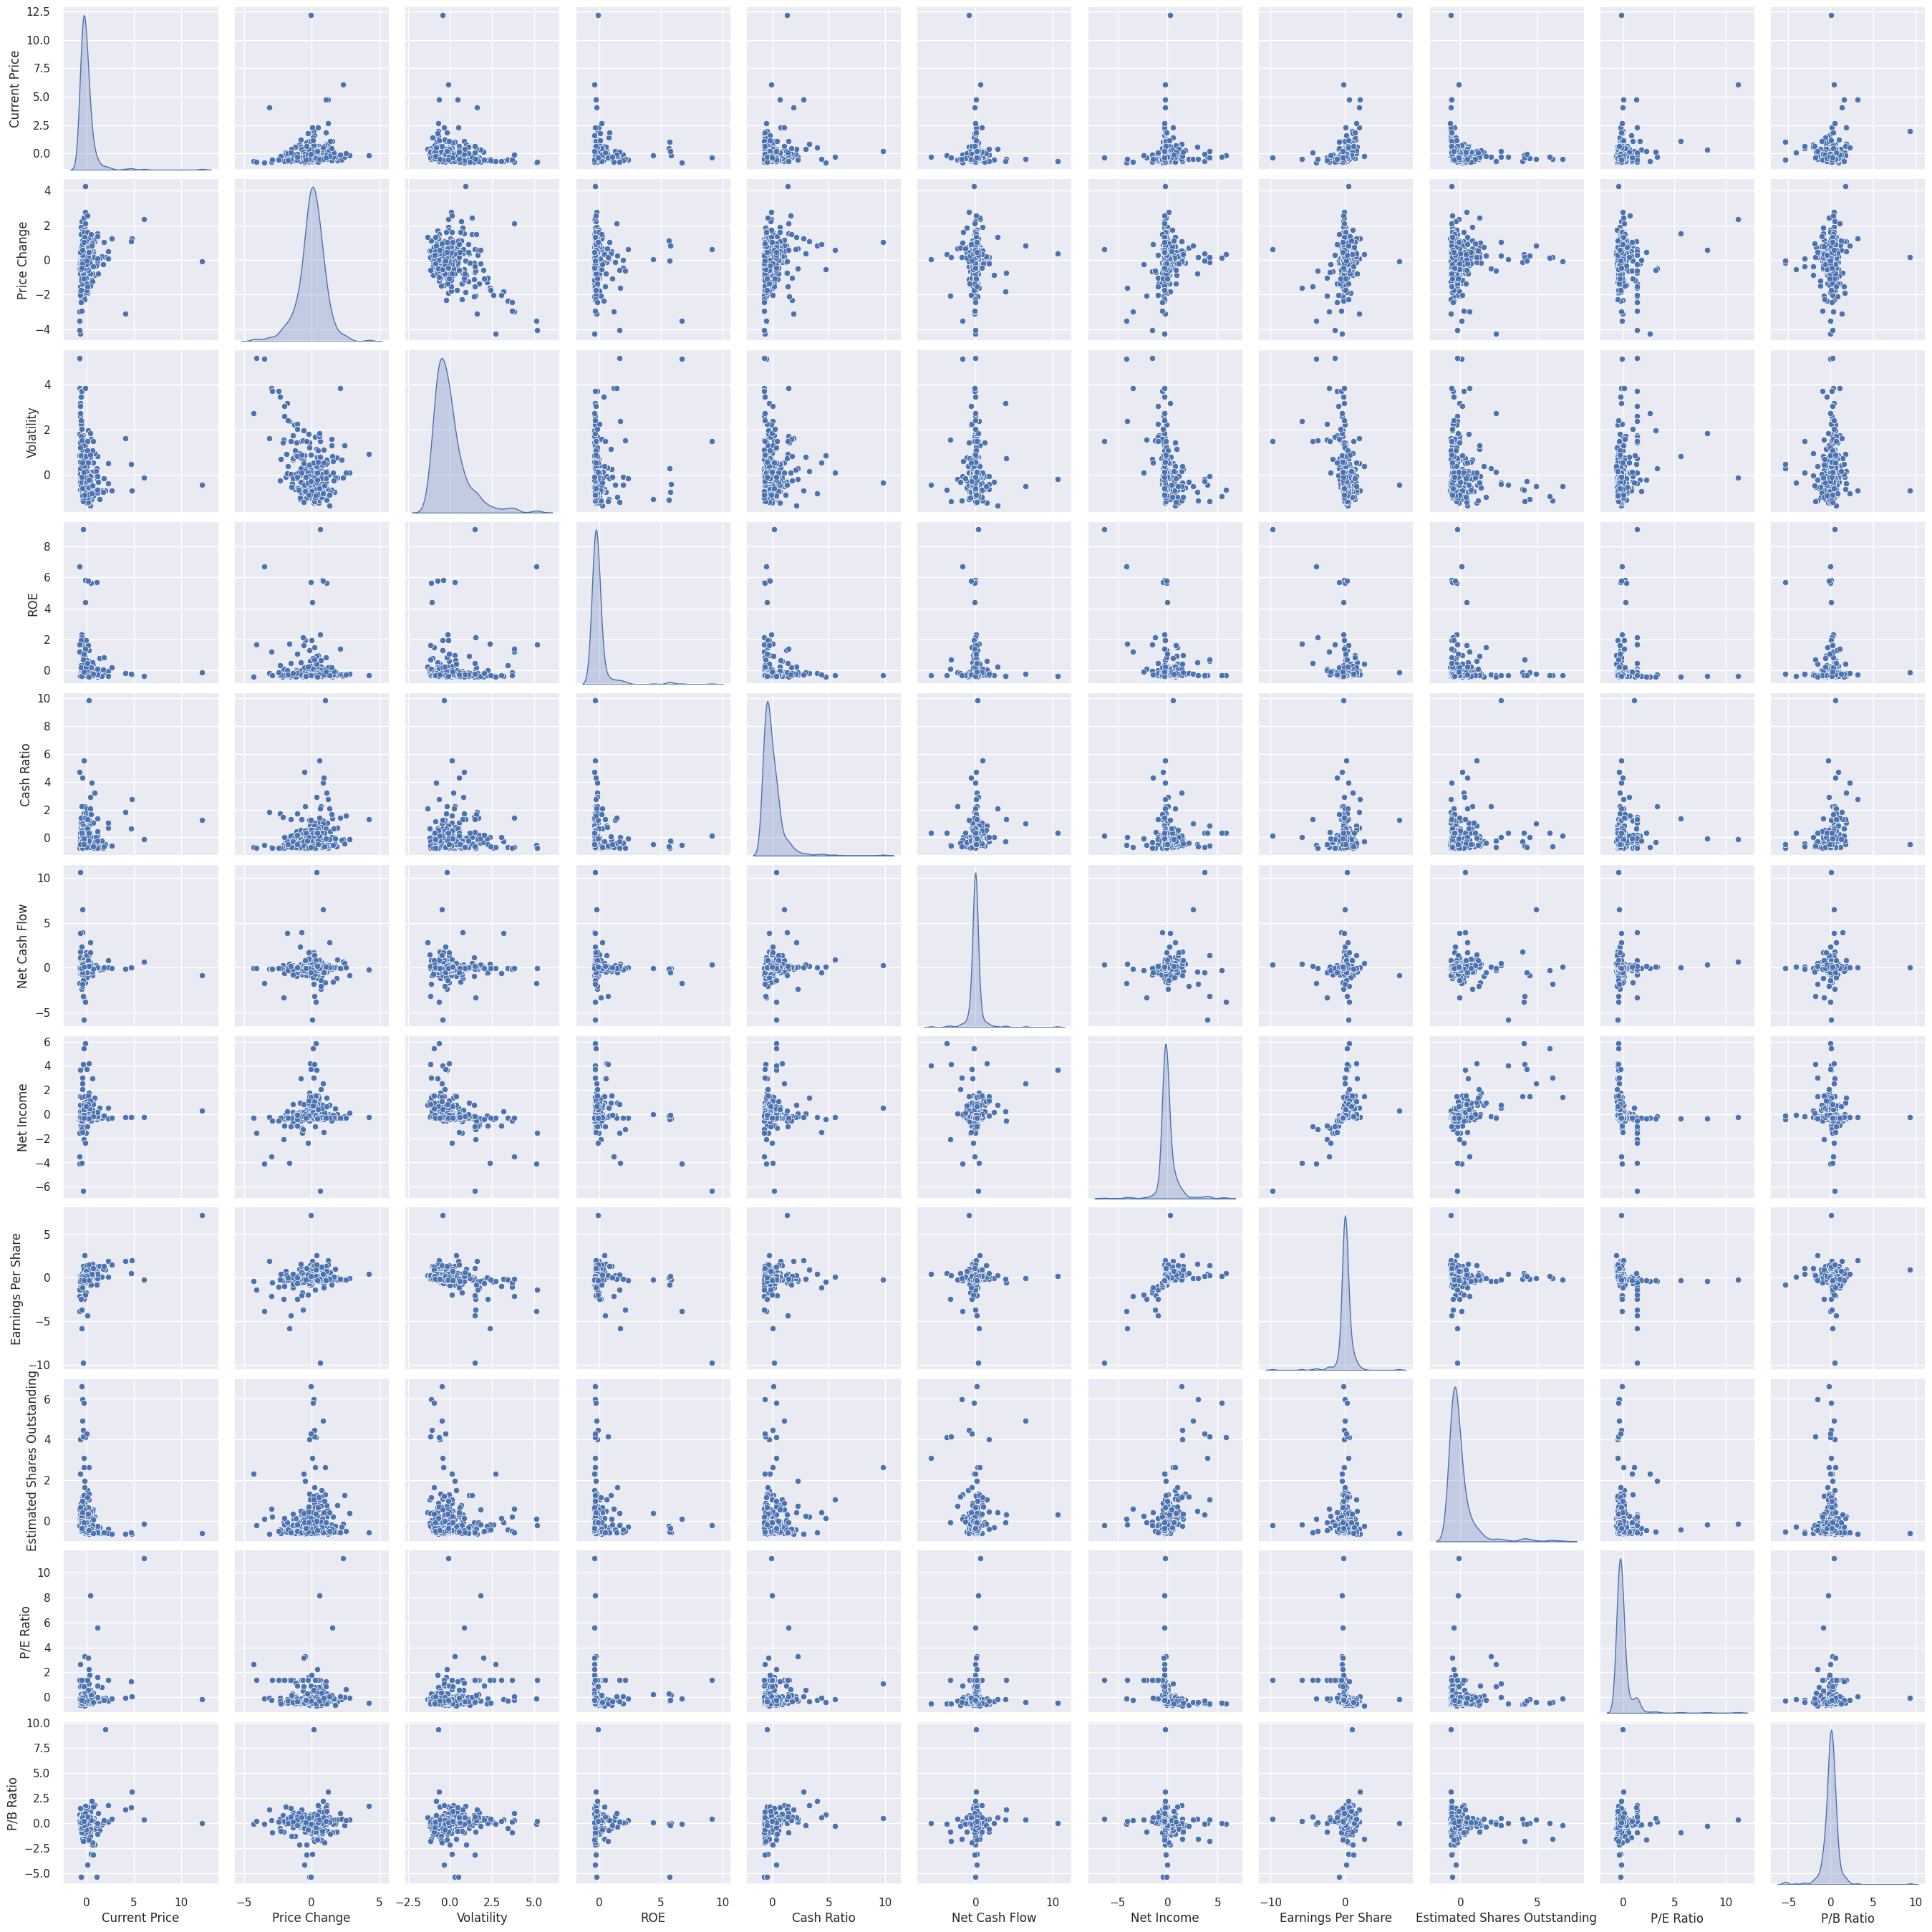

In [ ]:
#create pairplot for scaled dataframe
sns.pairplot(subset_scaled_df,diag_kind='kde')

In [ ]:
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.107863  -0.652487  -0.506653  
1                      1.250274  -0.311769  -0.504205  
2                      1.098021  -0.391502   0.094941  
3                     -0.091622   0.947148   0.424333  
4                      1.978399   3.293307   0.199196

## EDA

- It is a good idea to explore the data once again after manipulating it.

## K-means Clustering

### Checking Elbow Plot

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


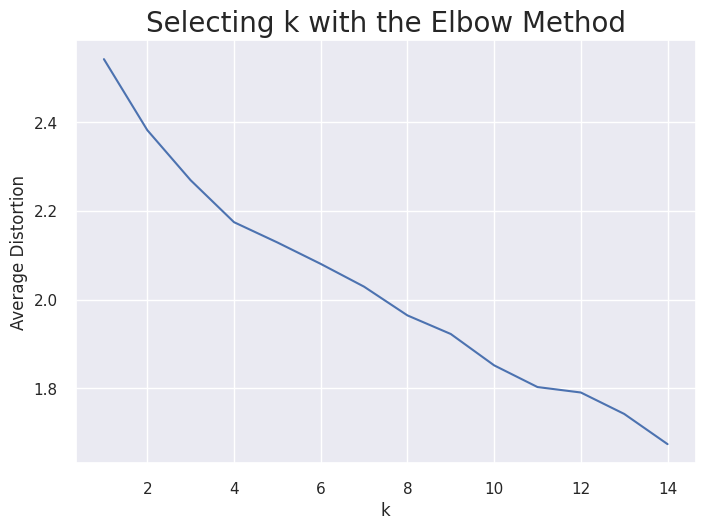

In [ ]:
#print average distortions for range of kmeans models fitted to scaled dataset
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

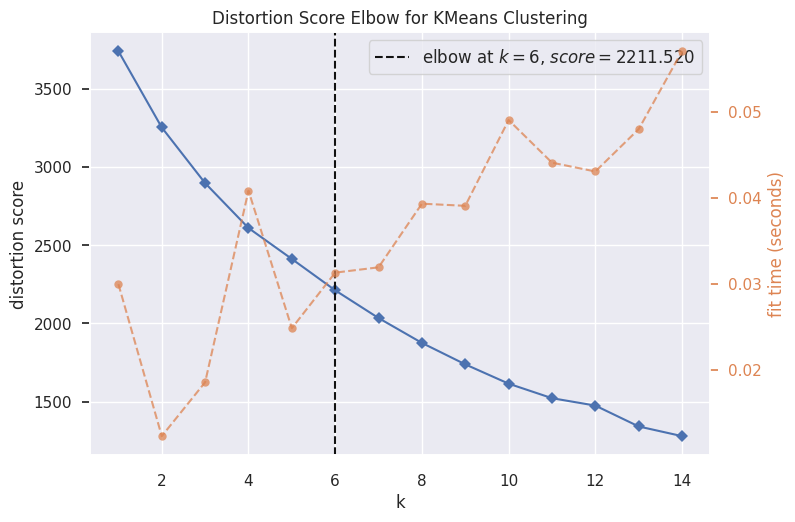

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#fit KMeans model and use visualizaer to indicate optimal K value
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)
visualizer.show()

### Checking the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


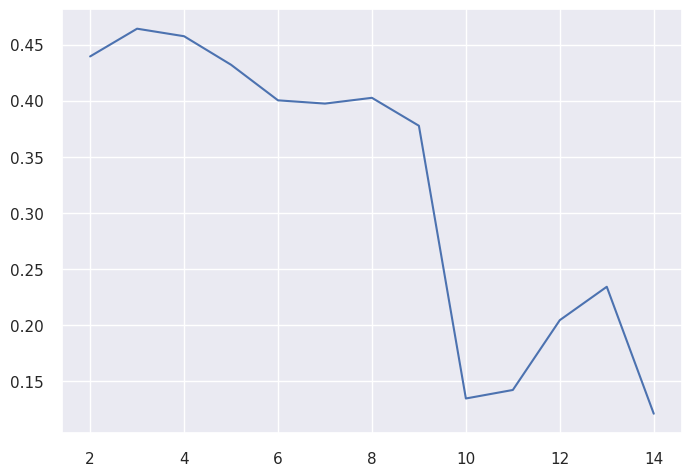

In [ ]:
sil_score = []
cluster_list =  range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

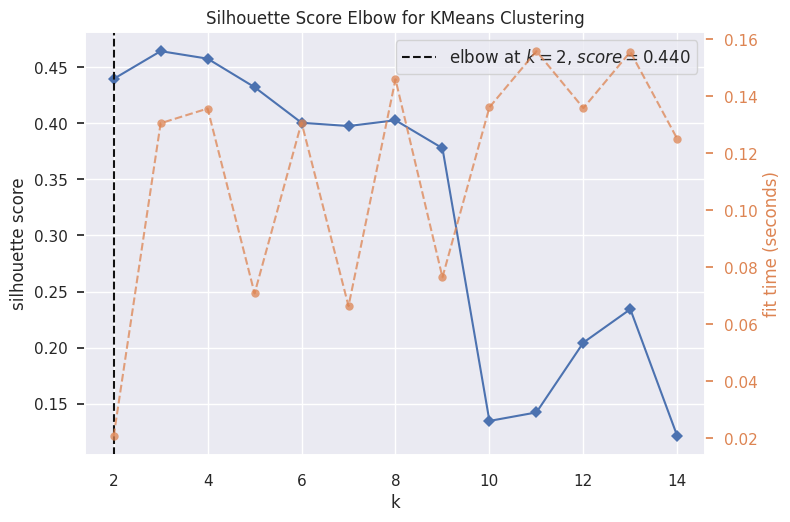

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)
visualizer.show()

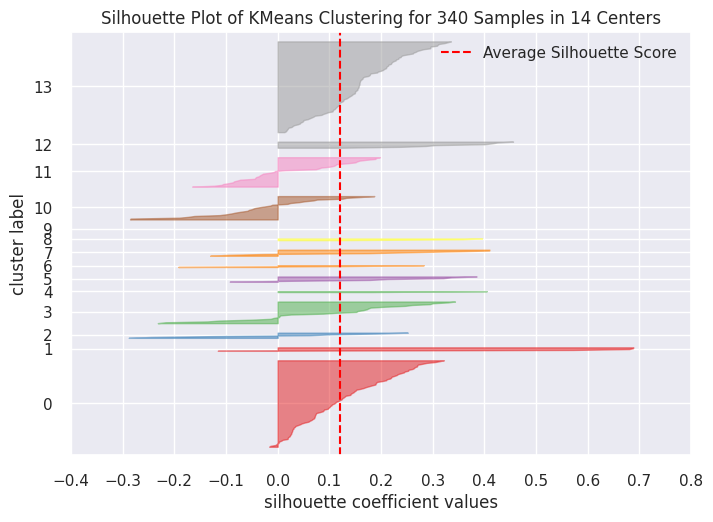

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(14, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

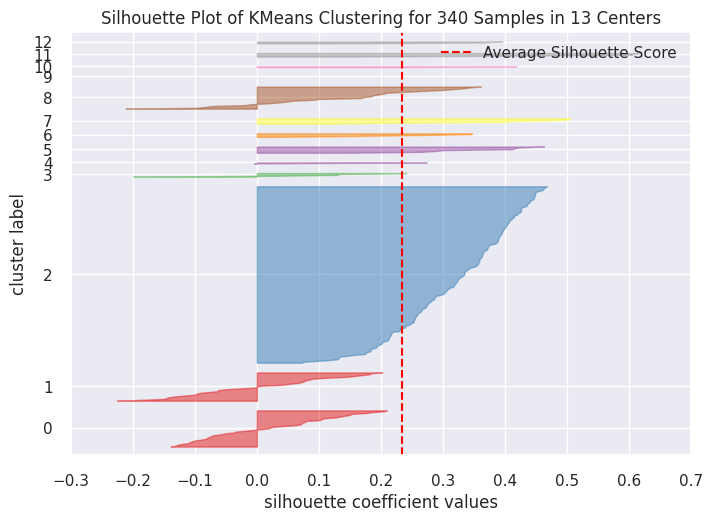

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 13 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(13, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

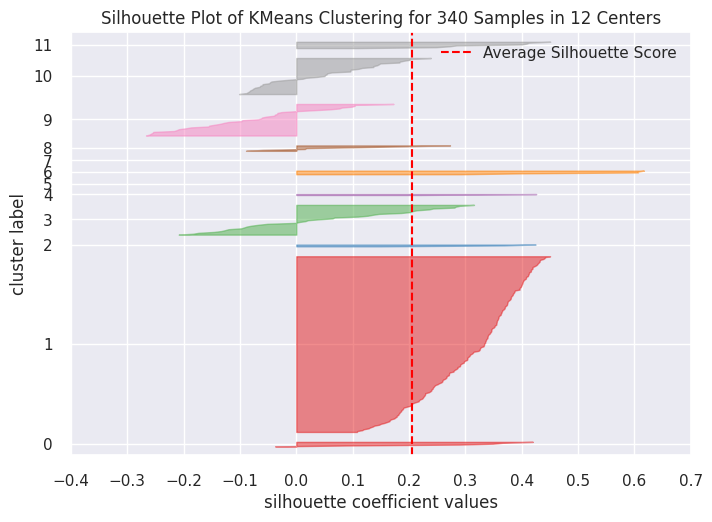

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(12, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

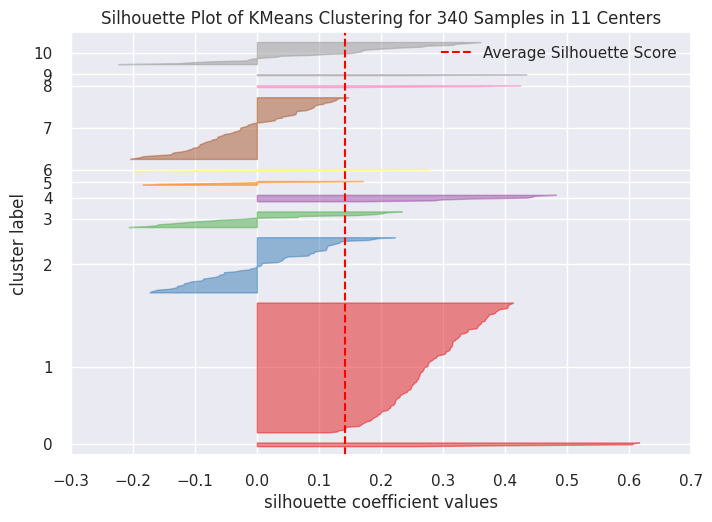

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(11, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

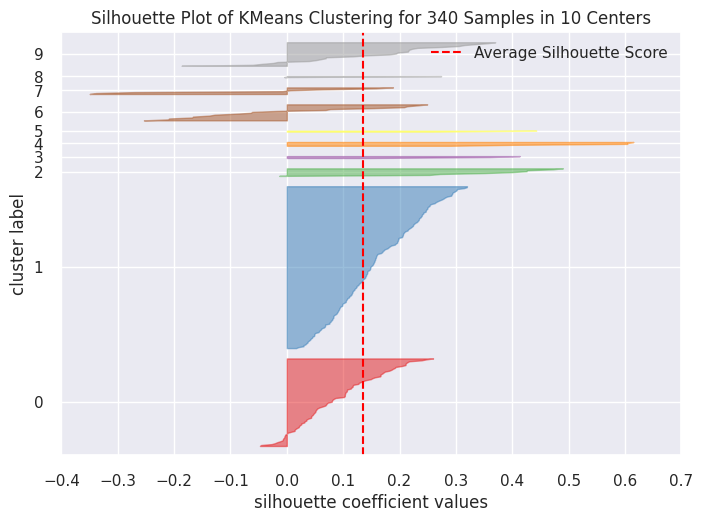

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

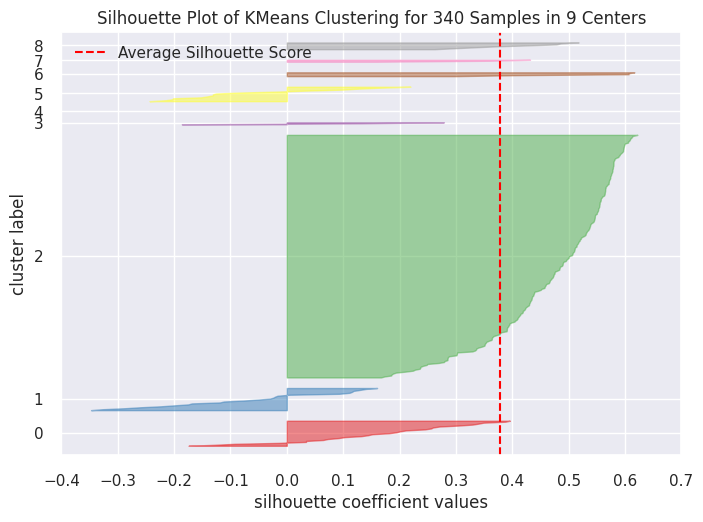

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

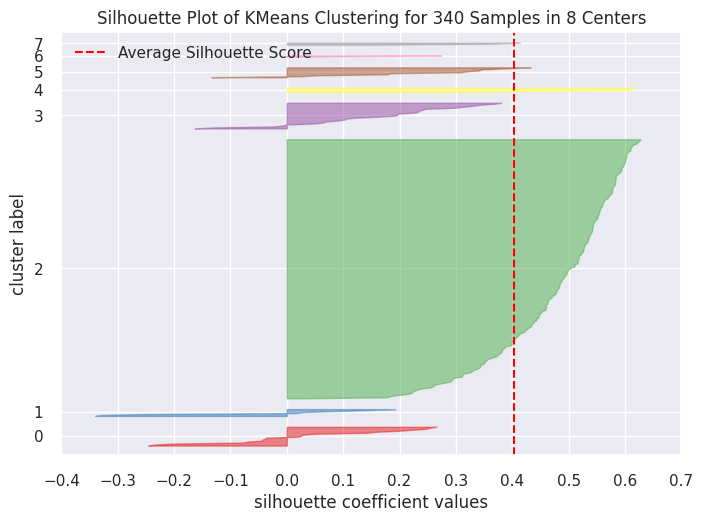

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

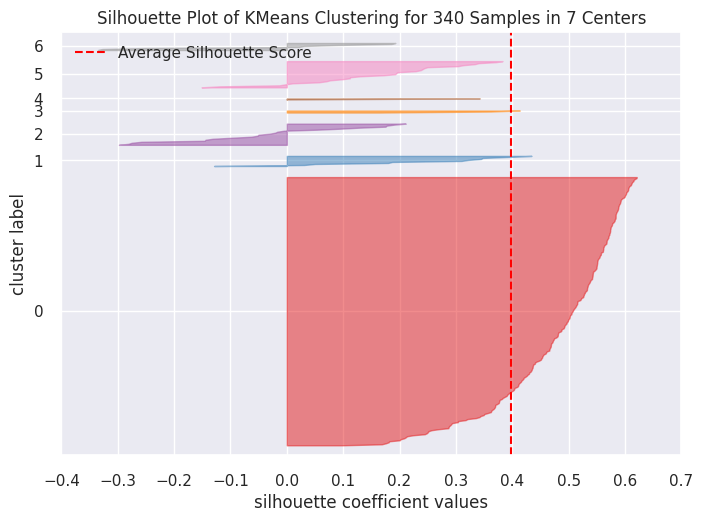

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

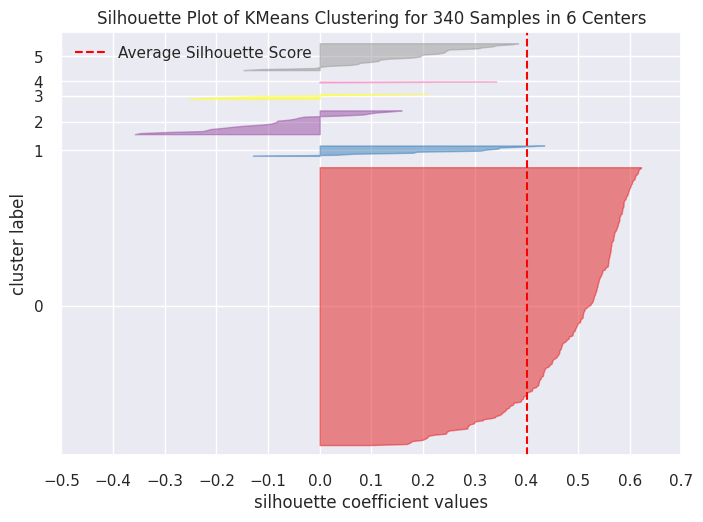

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

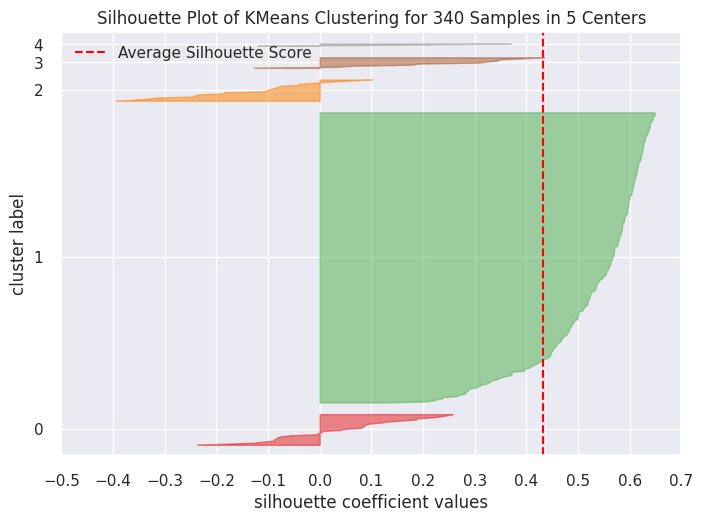

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

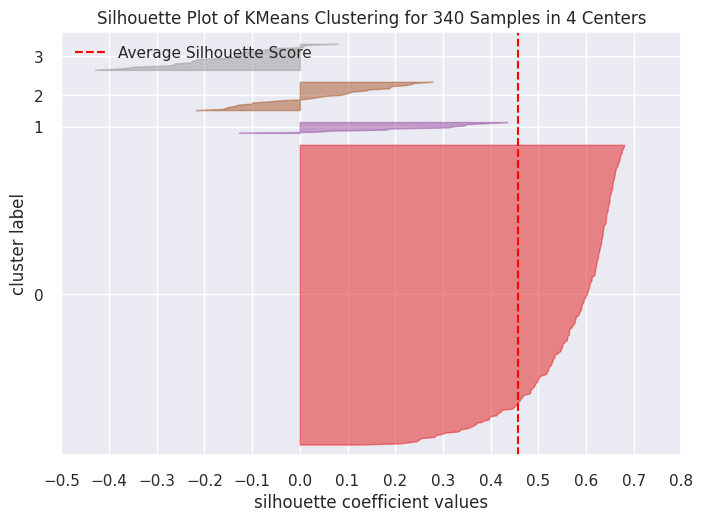

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

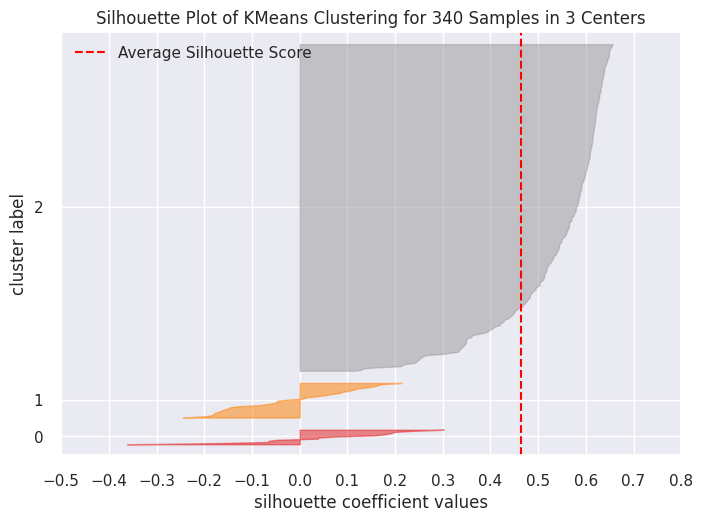

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

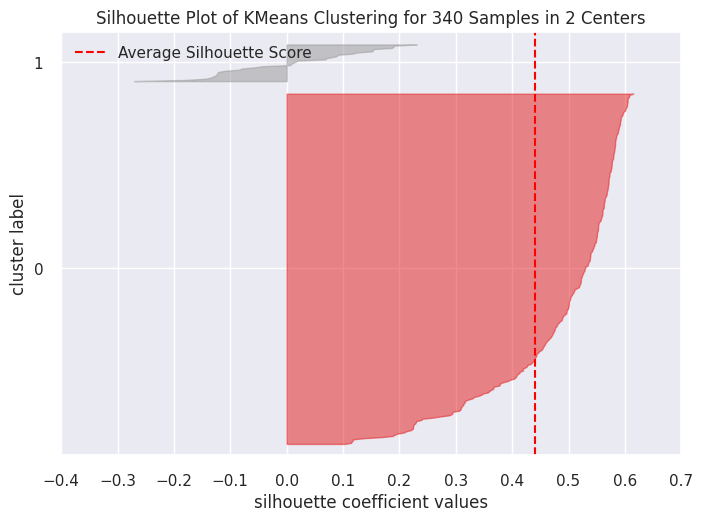

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Observation**
* TThe K value was chosen based on Elbow method and the distortion which has 6 as its optimal K. Therefore 6 was choosen as the optimal K value for the K-Mean clustering.
* The Silhouette could not give a good optimal K due to the fact that no K could cut through all the clusters and however k greater than 10 values seems to cut through all but that gives a lot of clustering.

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE 

In [ ]:
#print number of stocks within each sector for all of the clusters
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    30
             Industrials                    52
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          3
             Health Care                     2
             Information Technology          1
2            Consumer Discretionary          3
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     5
             Information Technology          3
             Real E

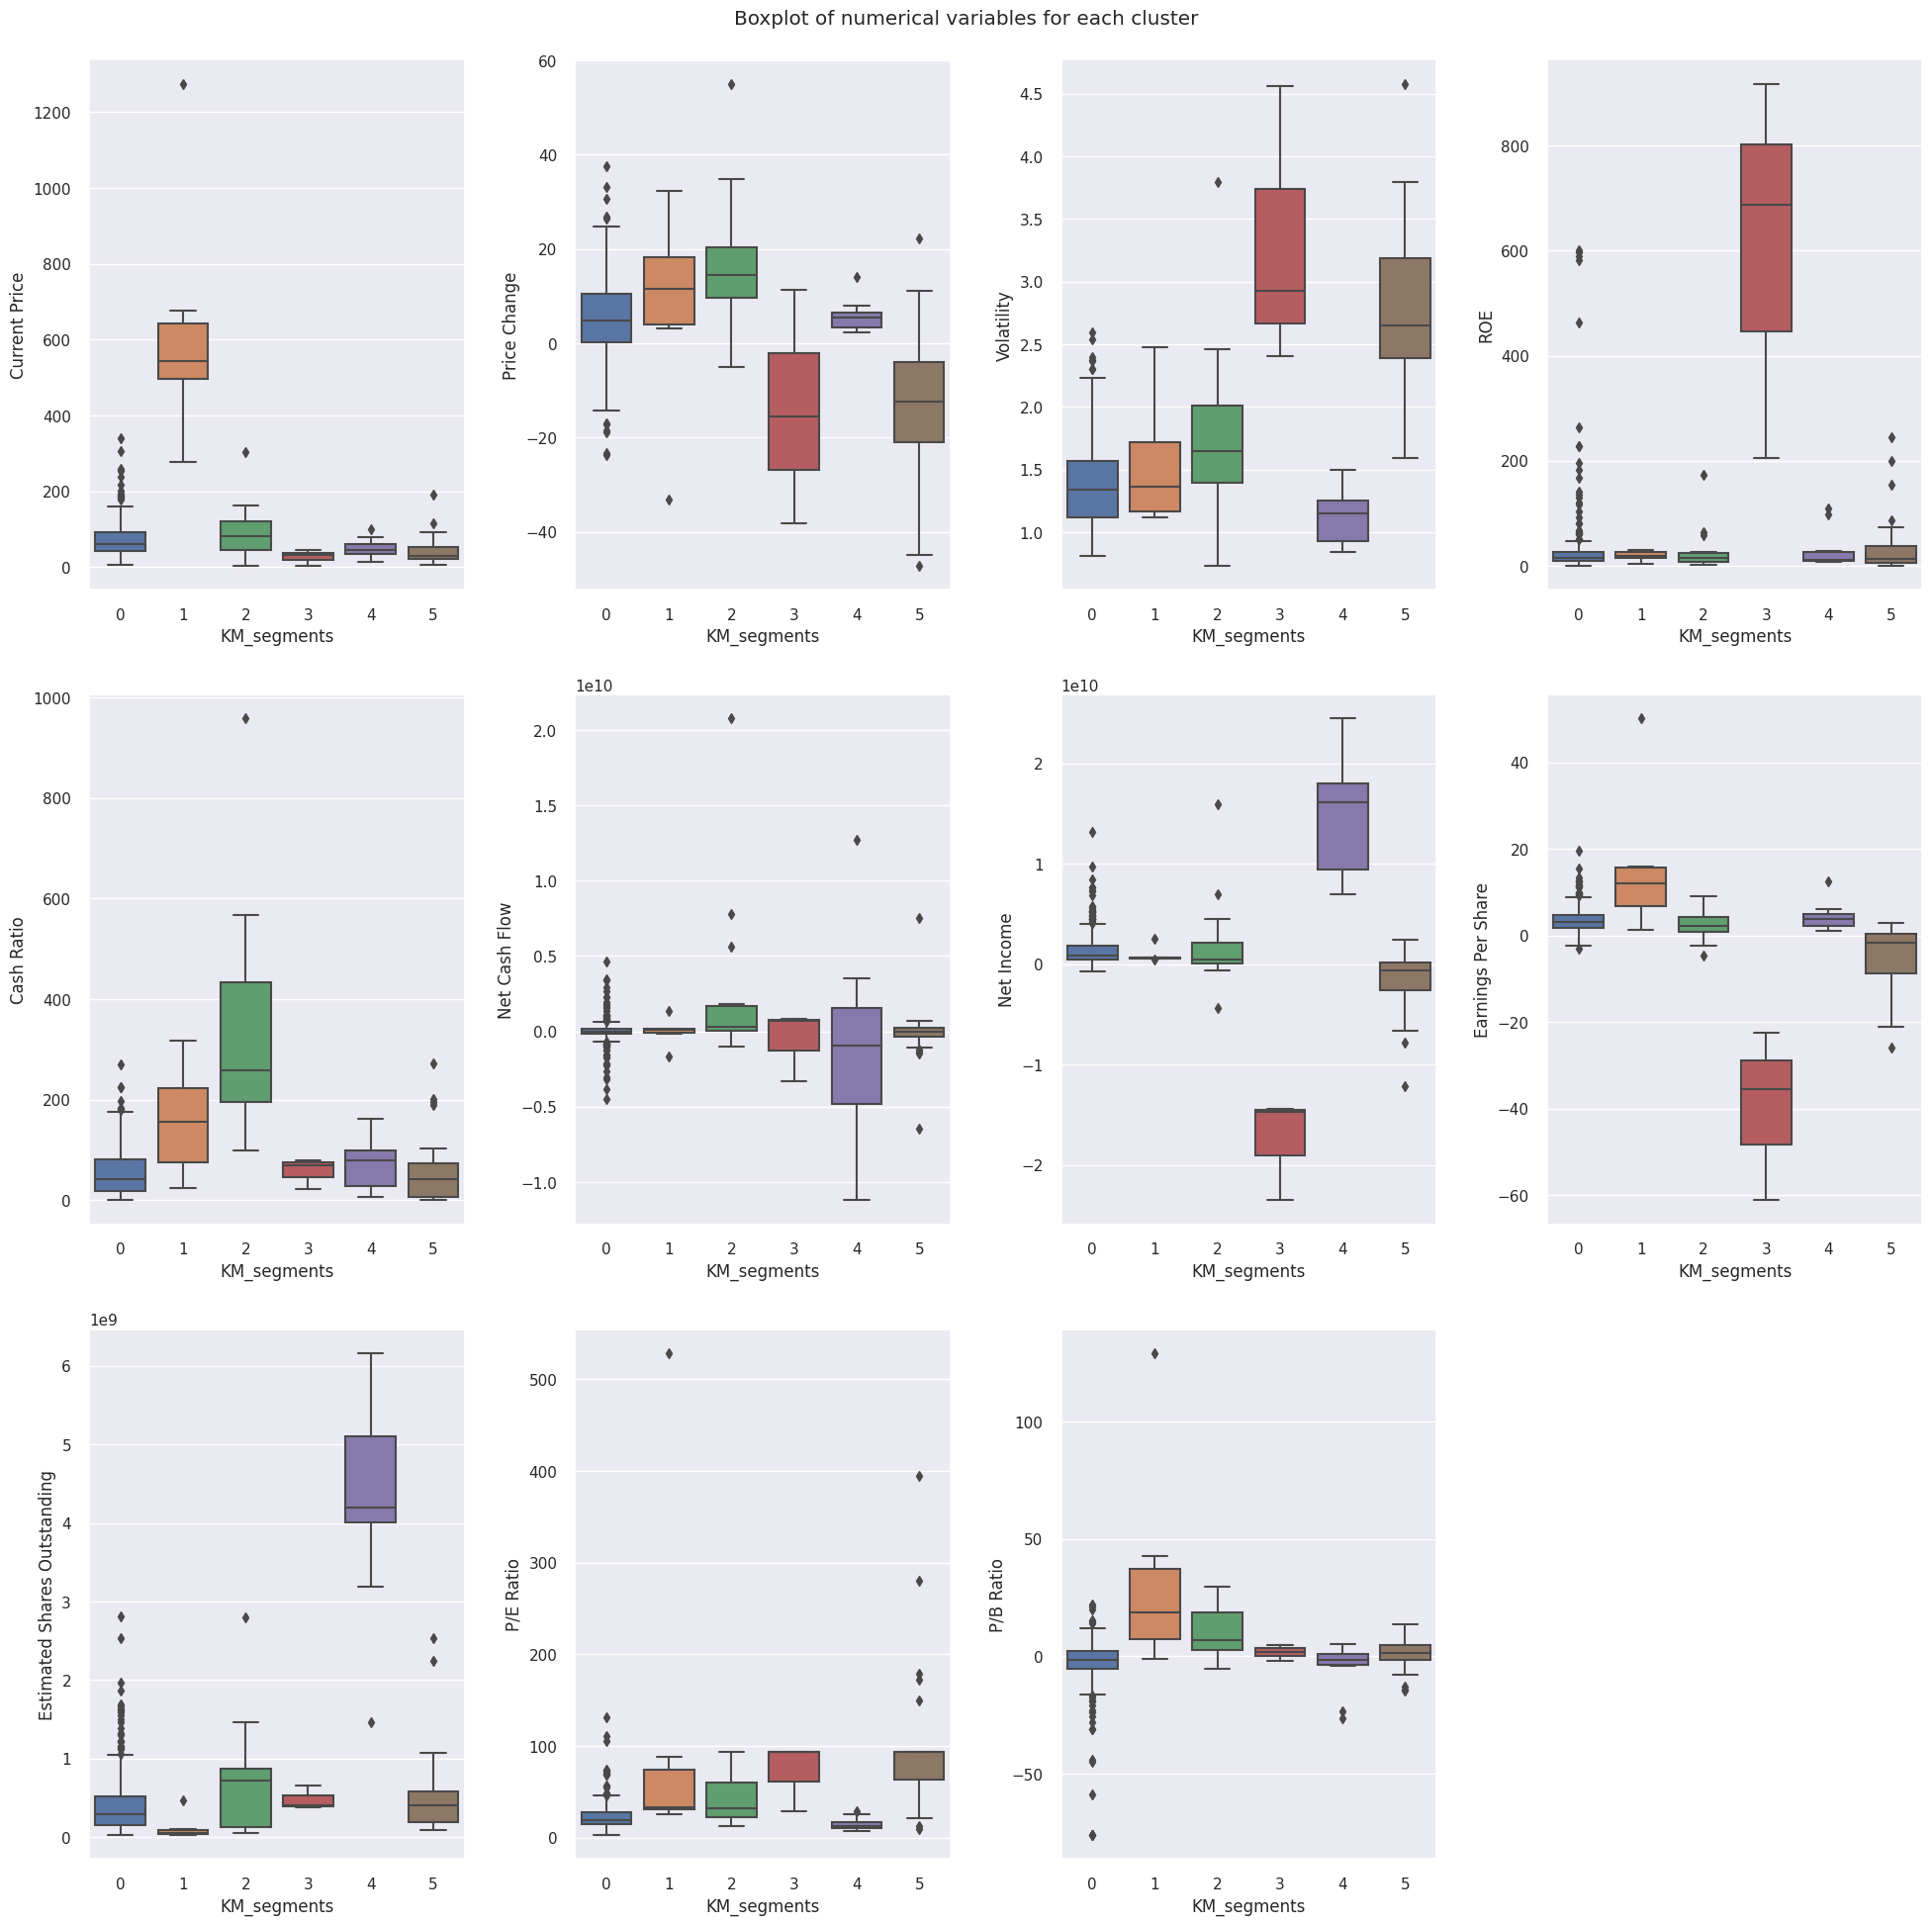

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### KMeans Clusters
**Cluster 0**
- 276  which comprised sectors from Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services, and Utilities
- Companies within this cluster have:
    - Low Volatility
    - Low net income
    - low cashflow
    - low cash ratio
    - low P/E Ratio

**Cluster 1**
- 3 stocks, comprised mostly of stocks within the Consumer Discretionary, Health Care, and Information Technology
- Companies within this cluster have:
- low Volatility
- Highest current Price
- High price change
- lowest Return on Equity
- Low  Net income
- low Cash Flow


**Cluster 2**
- 16 stocks from companies like Consumer Discretionary,Consumer Staples, Energy,Financials,Health Care,Information Technology,Real Estate,Telecommunications Services.
- Companies within this cluster have:

- Moderate Volatility
- Highest current Price
- Low price change
- low Return on Equity
- Low  Net income
- low Cash Flow

**Cluster 3**
- 3 stocks, comprised  of stocks from the Energy sectors
- Companies within this cluster have:
  - Highest Volatility
- low current Price
- Low price change
- Highest Return on Equity
- Lowest  Net income
- low Cash Flow

**Cluster 4**
- 11 stocks, comprised  of stocks from the  Consumer Discretionary, Consumer Staples, Energy, Financials, Health Care, Information Technology, and Telecommunications Services sectors.
- Companies within this cluster have:
- low Volatility
- low current Price
- Moderate price change
- Low Return on Equity
- Highest  Net income
- low and high Cash Flow

**Cluster 5**
- 28 stocks, comprised  of stocks from the Energy, Health Care, Industrials, Information Technology, and  Materials sectors.
- Companies within this cluster have:
- High  Volatility
- low current Price
- Low and negative price change
- Low Return on Equity
- low  Net income
- low  Cash Flow



## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

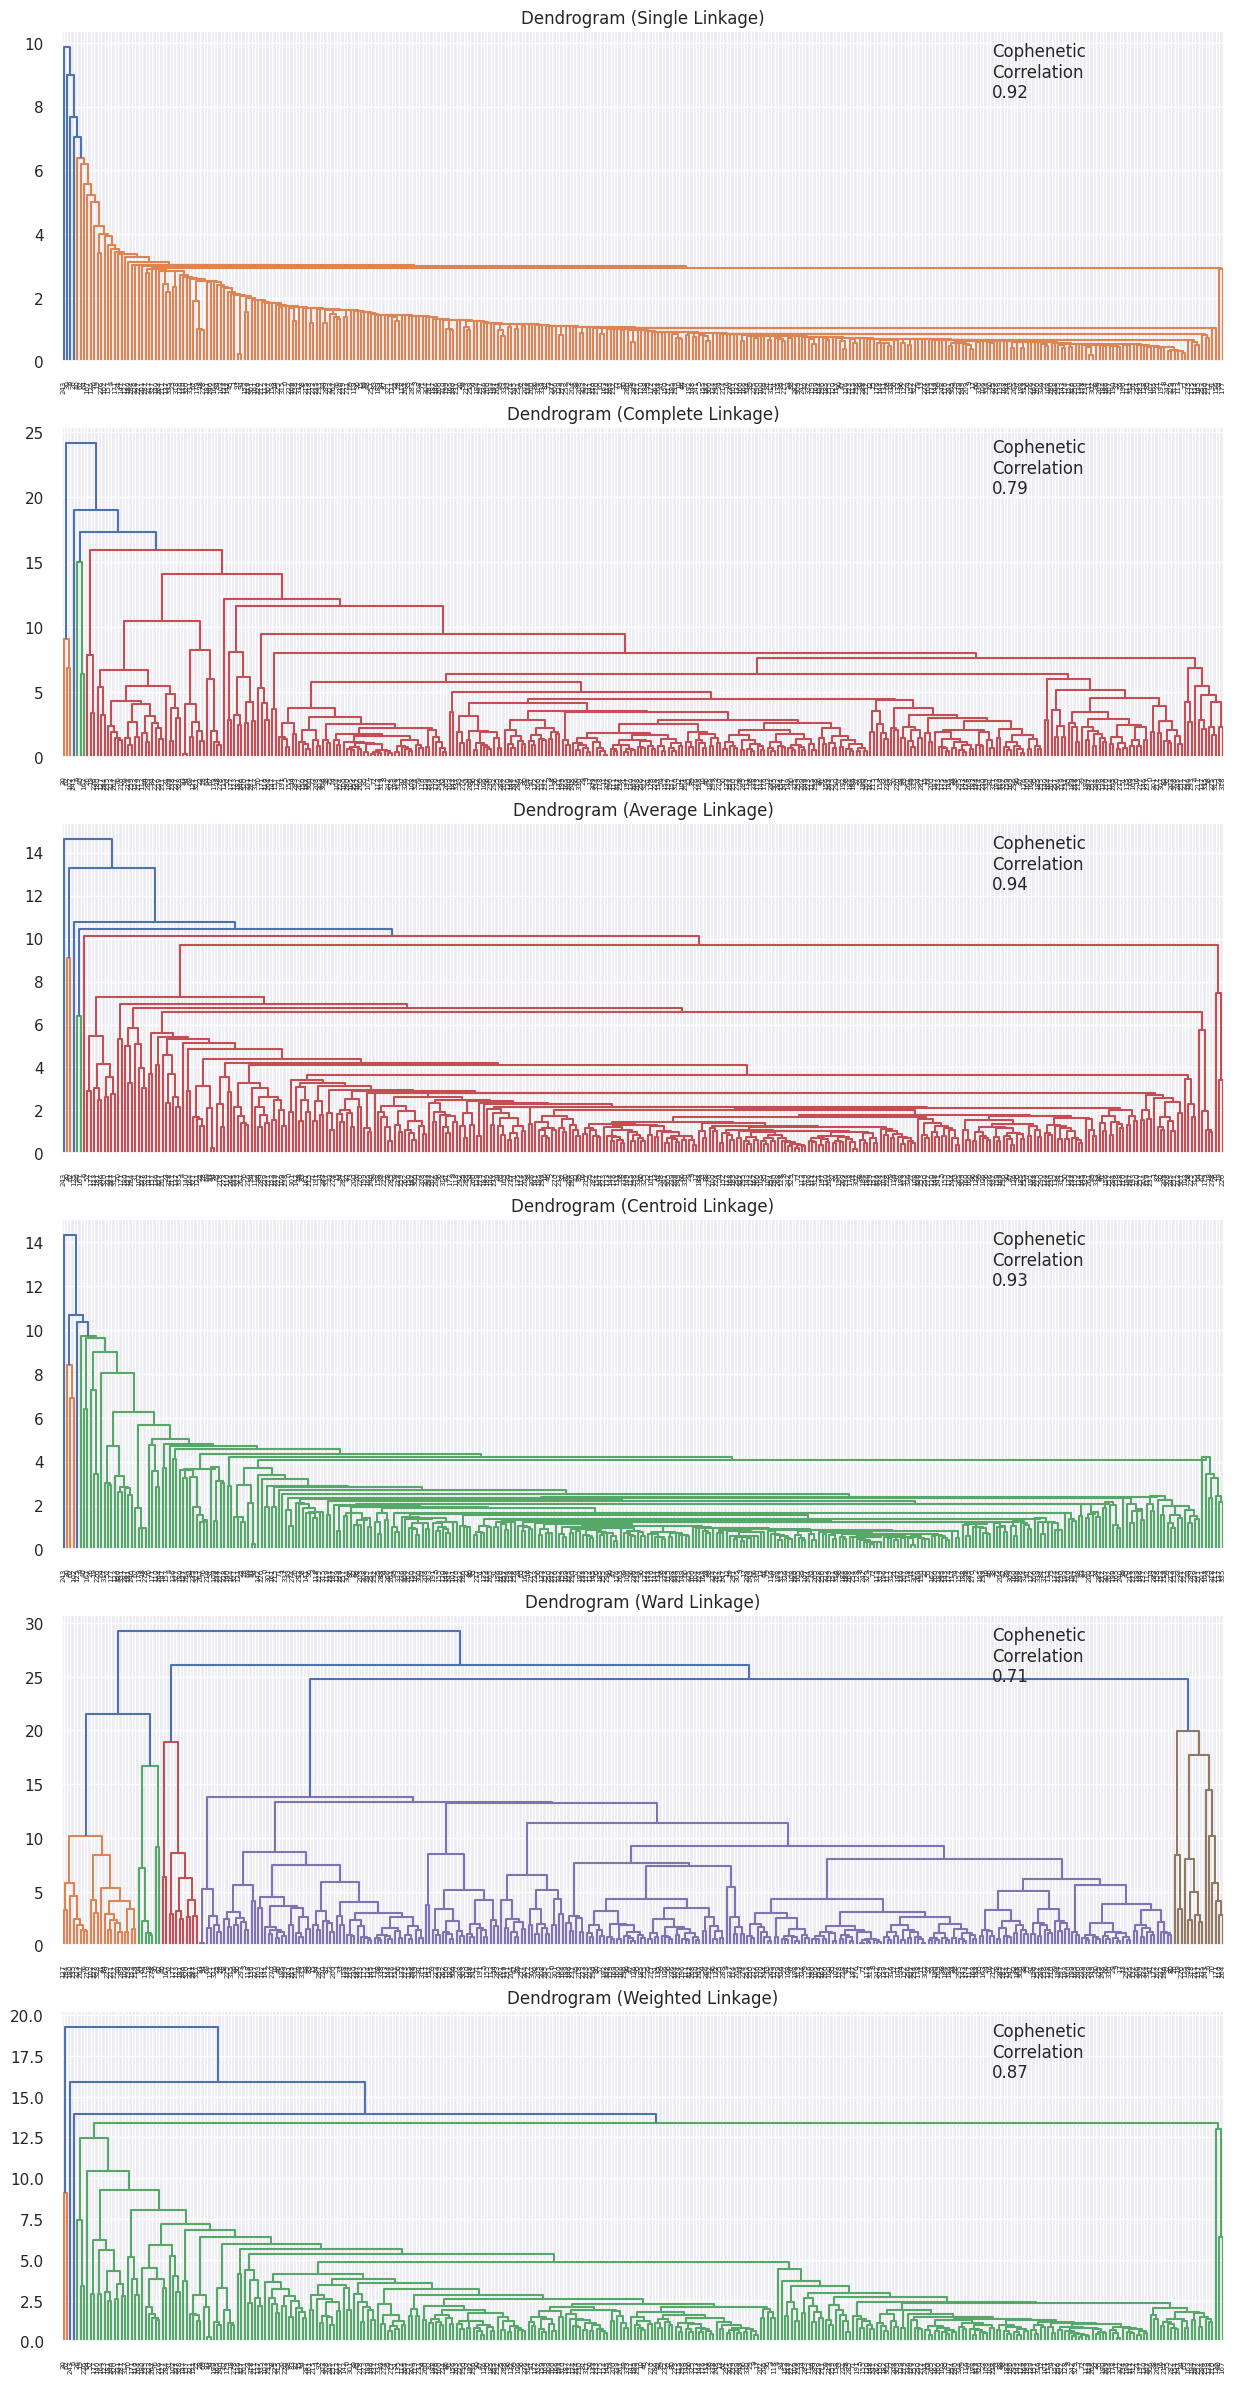

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observation**
- The highest cophenetic correlation is observed for the average and centroid linkage methods, yet the dendrogram associated with the average linkage method seems to yield more coherent clusters.
- The average linkage method suggests that the optimal number of clusters is 5.

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

### Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC Inc.'
 'The Bank of New Yo

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         31
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
3            Information Technology          1
4            Information Technology          1
Name: Security, dtype: int64

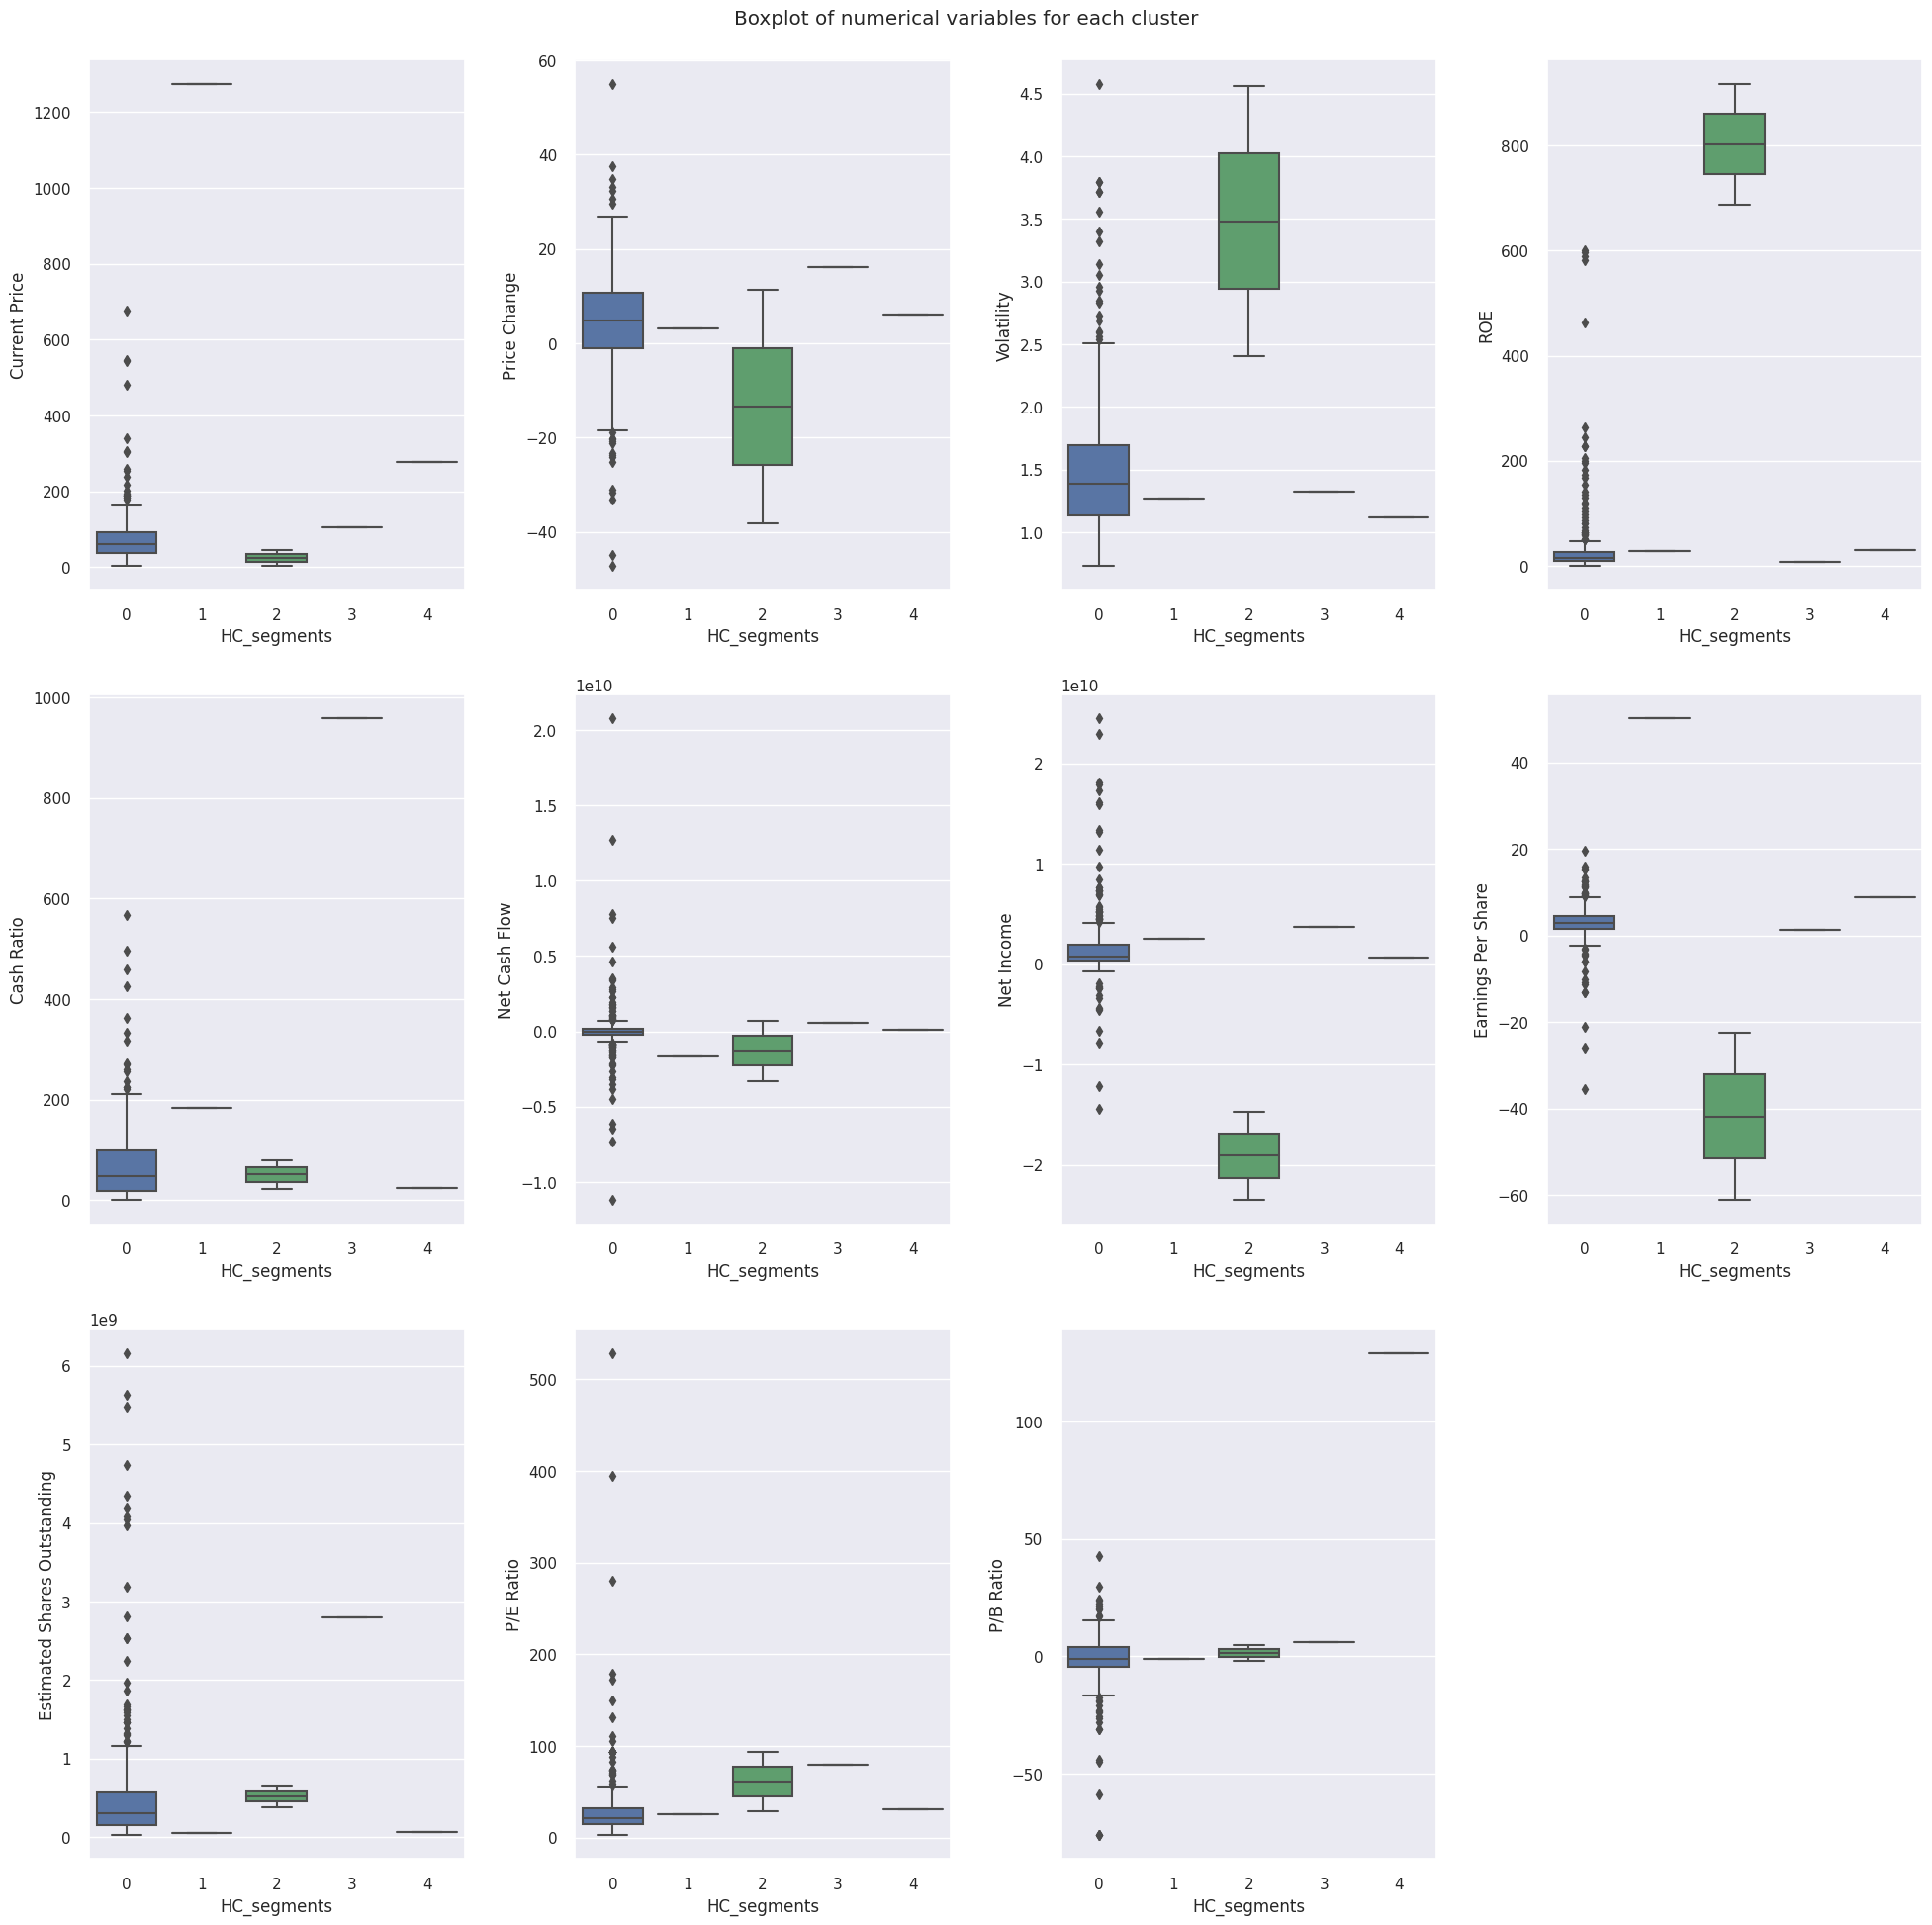

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

### Creating  Final model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          2
             Consumer Staples                1
             Health Care                     4
             Information Technology          3
             Real Estate                     1
             Telecommunications Services     1
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

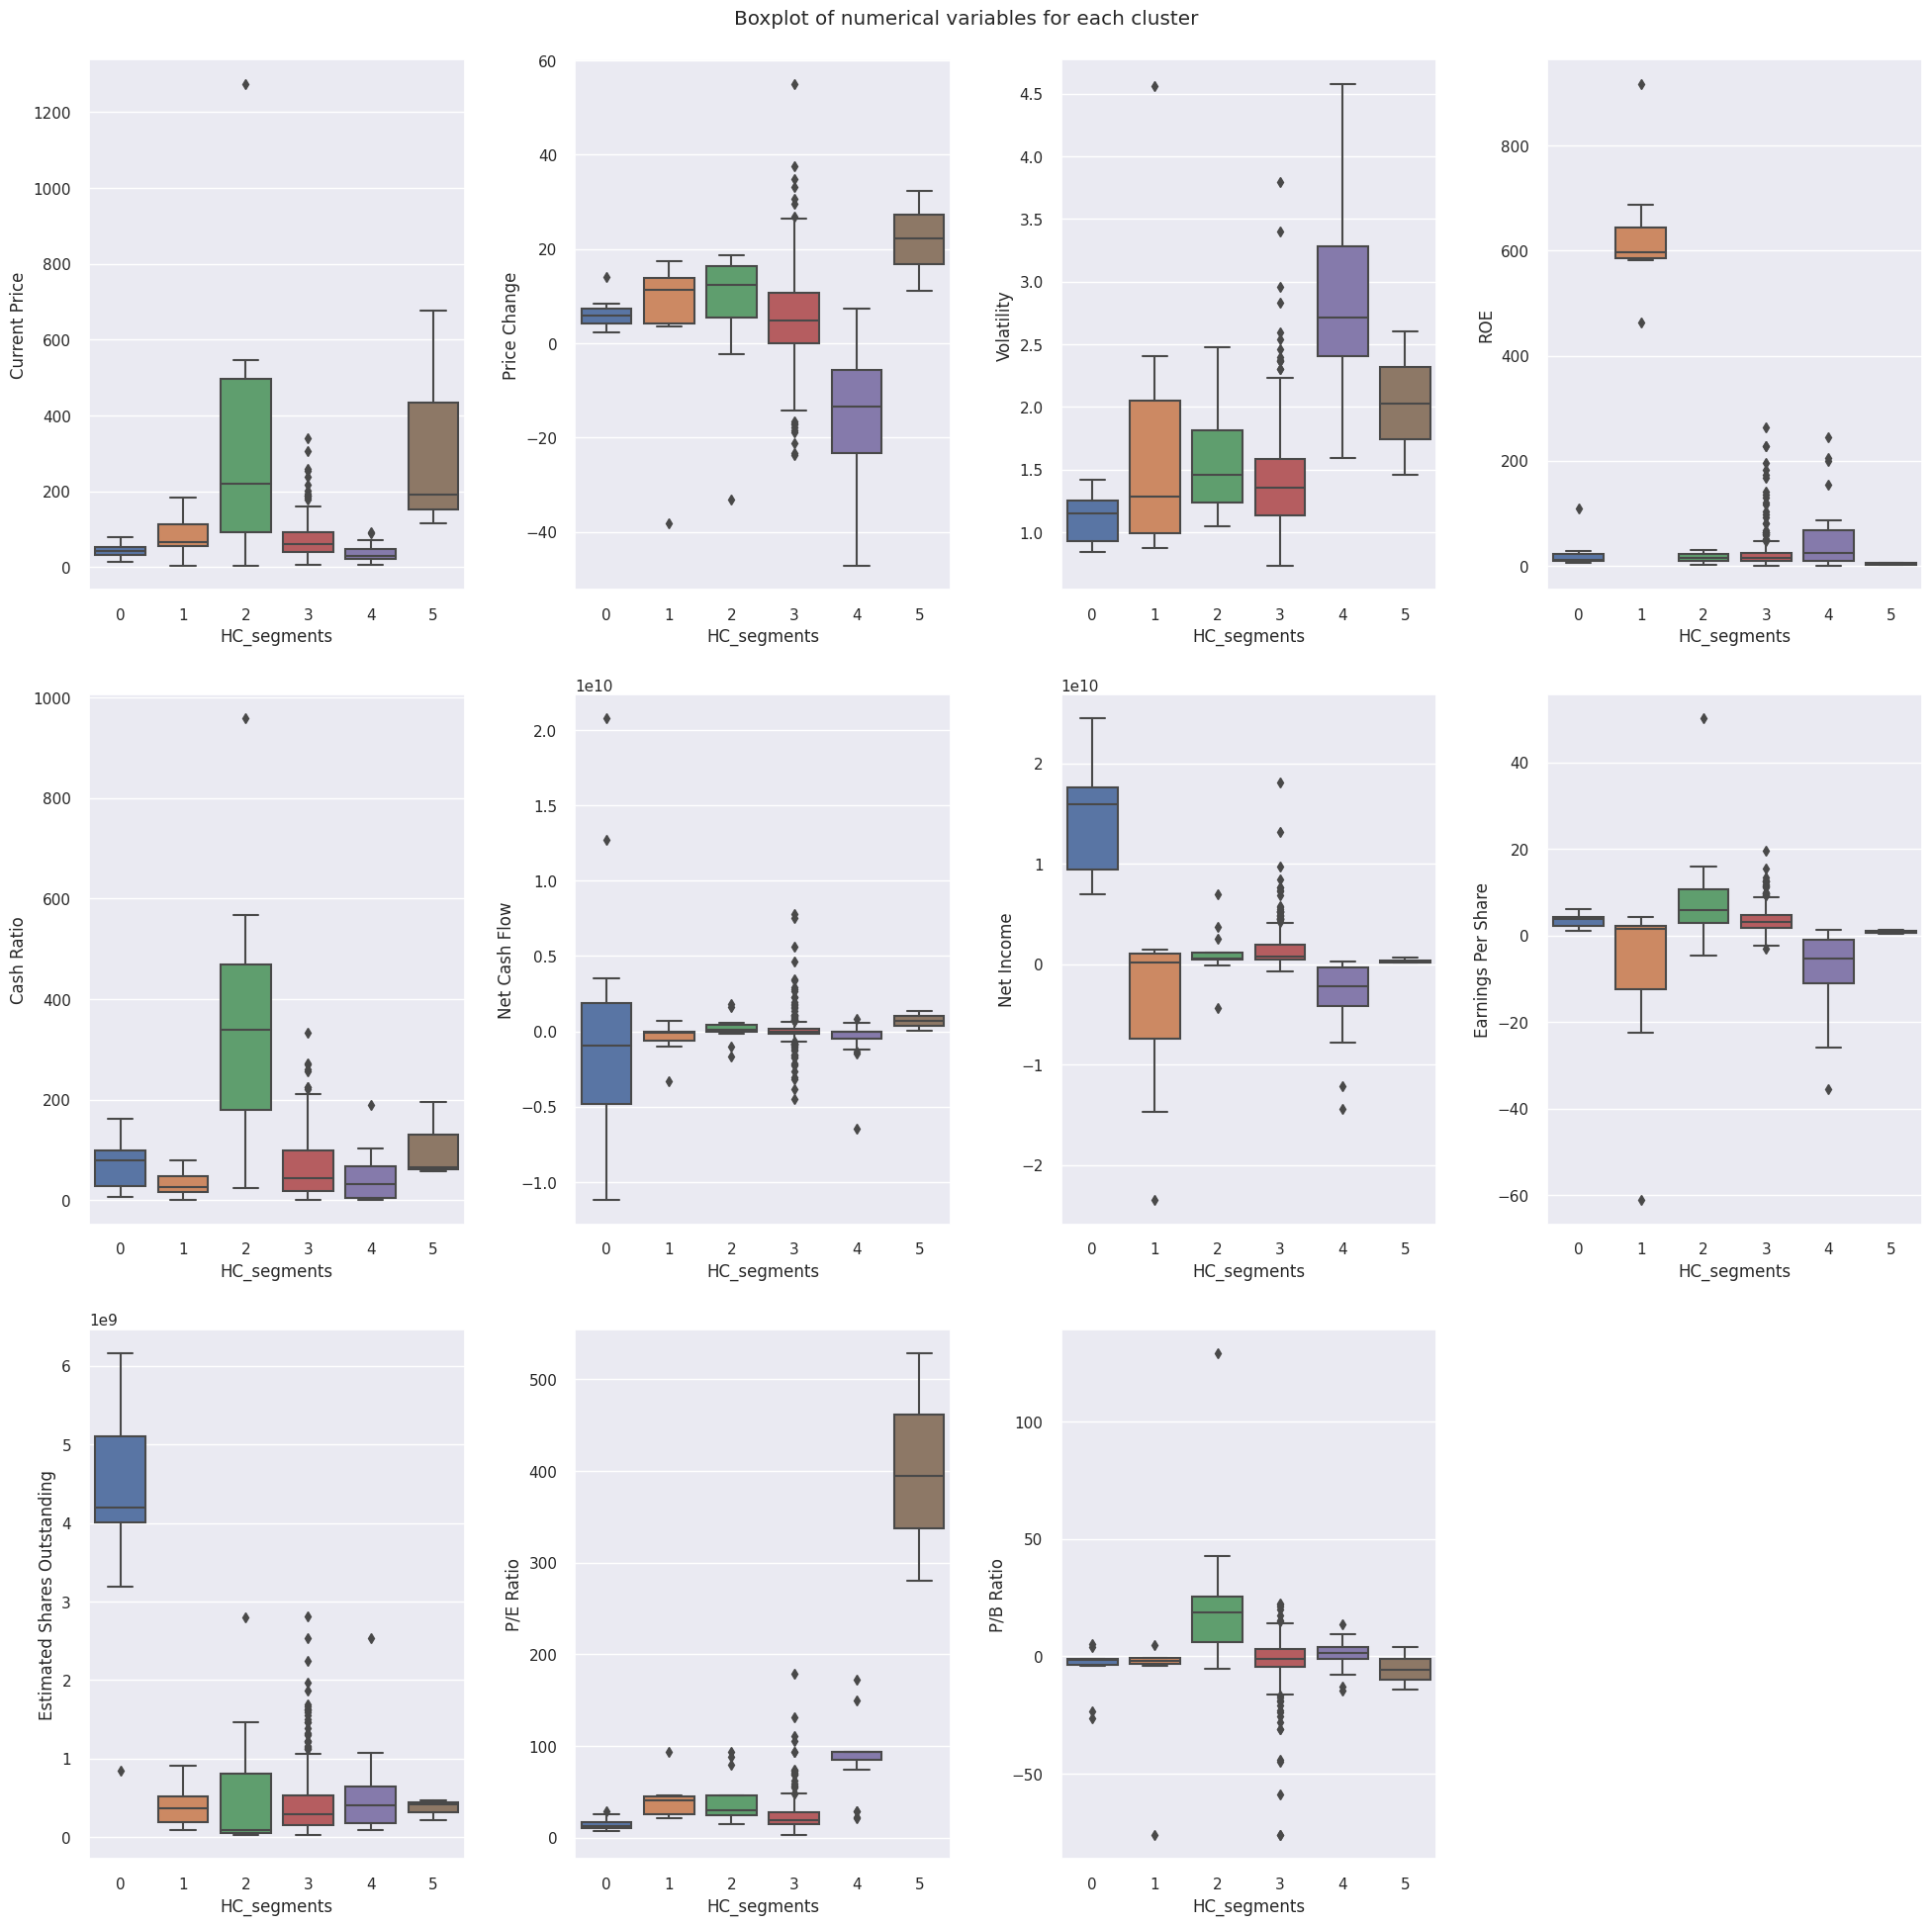

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

### Hierarchical Clusters

**Cluster 0**
 - 11 stocks, comprised mostly of stocks within theConsumer Discretionary, Consumer Staples, Energy, Financials, Health Care, Information Technology,  and Telecommunications Services.

- Companies within this cluster have:
- Low Volatility
- Very low current Price
- Low Return on Equity
- Highest Net income
- Highest Cash Flow
- Highest Estimated Outstanding Shares

**Cluster 1**
- 7 stocks, comprised mostly of stocks within the Consumer Discretionary, Consumer Staples, Energy, Financials, and Industrials

- Companies within this cluster have:
- Moderate Volatility
- Low current Price
- Highest Return on Equity
- Low Net income
- Moderate Cash Flow
- Low Estimated Outstanding Shares

**Cluster 2**
- 12 stocks Consumer Discretionary, Consumer Staples, Health Care, Information Technology,Real Estate, and Telecommunications Services.
- Companies within this cluster have:
- Moderate Volatility
- Higest current Price
- Very low Return on Equity
- Low Net income
- low Cash Flow

**Cluster 3**
- 285 stocks, a vast majority of which are in the Consumer Discretionary, Consumer Staples, Energy, Financials, Health Care,Industrials, Information Technology, Materials, Real Estate, Telecommunications Services, and  Utilities.
Companies within this cluster have:
- low Volatility
- low current Price
- Very low Return on Equity
- Low Net income
- low Cash Flow

**Cluster 4**
- 23 stocks, from Energy,Information Technology,Materials and,Consumer Discretionary sectors.
Companies within this cluster have:
- Highest Volatility
- low current Price
- low Return on Equity
- Very Low Net income
- low Cash Flow

**Cluster 5**
- 3 stocks, from Consumer Discretionary, Health Care, Information Technology Sectors.
Companies within this cluster have:
- High Volatility
- High current Price
- Highest price change
- lowest Return on Equity
- Low  Net income
- low Cash Flow

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

**Which clustering technique took less time for execution?**
- Both the KMeans model and the Agglomerative Clustering model successfully fit the dataset in approximately 0.1 seconds.
**Which clustering technique gave you more distinct clusters, or are they the same? How many observations are there in the similar clusters of both algorithms?**
Both algorithms yield comparable clusters, featuring a dominant cluster encompassing a majority of the stocks, while the remaining five clusters consist of 2 to 28 stocks each.

**How many clusters are obtained as the appropriate number of clusters from both algorithms?**
In the case of both algorithms, the utilization of 6 clusters resulted in well-defined clusters, each containing an ample number of observations to effectively distinguish the representative "type" of stock within the cluster.

**Differences or similarities in the cluster profiles from both the clustering techniques**
- Both algorithms produced analogous clusters by considering the outliers present across the 11 variables.

## Actionable Insights and Recommendations

-

- Trade&Ahead should initially assess their clients' financial objectives, risk tolerance, and investment patterns before suggesting a cluster that aligns with these requirements as a potential stock portfolio.

- Nevertheless, a considerable number of these clusters, based on their constituent stock attributes, essentially serve as alternatives to standard indexes. Achieving these objectives could potentially be more straightforward using such indexes.

- Alternatively, Trade&Ahead could employ these clusters as a foundational step for conducting comprehensive financial statement analysis. This approach could specifically highlight stocks that deviate from the cluster "profile."

- If the process of handpicking individual stocks is integral to a client's investment approach, Trade&Ahead may then be well-positioned to identify stocks that are likely to outperform their counterparts (resulting in a buy recommendation) or underperform (prompting a sell recommendation).